In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [43]:
pd.set_option("display.max_columns", None)

In [44]:
df = pd.read_csv("gurgaon_10kk_After_EDA1_.csv").sort_values("PRICE").reset_index(drop=True)
print(df.shape)
df.head()

(10032, 34)


SPID    PROP_ID     CITY   PRICE  PRICE_SQFT   AREA  \
0  70480214  j70480214  gurgaon  5500.0        15.0  350.0   
1  70794112  u70794112  gurgaon  7000.0        10.0  700.0   
2  70607360  o70607360  gurgaon  7500.0        14.0  514.0   
3  70794132  f70794132  gurgaon  8500.0         9.0  910.0   
4  69621256  s69621256  gurgaon  8500.0         8.0  980.0   

   TOTAL_LANDMARK_COUNT                      PROP_HEADING  \
0                   3.0  1 bhk flat in sector 107 gurgaon   
1                  15.0   1 bhk flat in sector 95 gurgaon   
2                   3.0  2 bhk flat in sector 107 gurgaon   
3                  15.0   2 bhk flat in sector 95 gurgaon   
4                   3.0   2 bhk flat in sector 95 gurgaon   

                                         DESCRIPTION          PROPERTY_TYPE  \
0  very much demanding property at dwarka express...  residential apartment   
1  rof ananda , sector 95, near to wazirpur villa...  residential apartment   
2  cheap rent and best place and location at dwar...  residential apartment   
3  rof ananda , sector 95, near to wazirpur villa...  residential apartment   
4  find this 2 bhk apartment for rent in sector 9...  residential apartment   

         FURNISH  FACING                     AGE TOTAL_FLOOR  BEDROOM_NUM  \
0    Unfurnished       5   0-1 Year Old Property   high rise          1.0   
1  Semifurnished       3   0-1 Year Old Property   high rise          1.0   
2    Unfurnished       5  5-10 Year Old Property   high rise          2.0   
3  Semifurnished       3   0-1 Year Old Property   high rise          2.0   
4    Unfurnished       1   0-1 Year Old Property   high rise          2.0   

                   PROP_NAME  BALCONY_NUM FLOOR_NUM   LATITUDE  LOGNITUDE  \
0  signature global solera 2          2.0  low rise  28.512525  76.973543   
1                 rof ananda          1.0  mid rise  28.484814  77.080853   
2  signature global solera 2          1.0  mid rise  28.512525  76.973543   
3                 rof ananda          1.0  mid rise  28.484814  77.080853   
4            ramsons kshitij          1.0  mid rise  28.416679  76.902677   

   BHK_BED       LOCALITY_NAME              BUILDING_NAME  \
0      1.0  sector 107 gurgaon  signature global solera 2   
1      1.0   sector 95 gurgaon                 rof ananda   
2      2.0  sector 107 gurgaon  signature global solera 2   
3      2.0   sector 95 gurgaon                 rof ananda   
4      2.0   sector 95 gurgaon            ramsons kshitij   

                SOCIETY_NAME ADDRESS  TRNSPORTATION  ACCOMODATION  LEISURE  \
0  signature global solera 2     NaN              1             0        0   
1                 rof ananda     218              2             0        0   
2  signature global solera 2     NaN              1             0        0   
3                 rof ananda     619              2             0        0   
4            ramsons kshitij     NaN              0             0        0   

   EDUCATION  HEALTH  OTHER  AMENITIES_SCORE  LANDMARKS_CLUSTER  \
0          0       0      2               86                  1   
1          0       0      7               63                  1   
2          0       0      2               76                  1   
3          0       0      7               64                  1   
4          0       3      0               99                  1   

   LANDMARKS_N_SCORES_CLUSTER  
0                           1  
1                           2  
2                           2  
3                           2  
4                           1

In [4]:
df['DESCRIPTION'].explode().unique().tolist()

['very much demanding property at dwarka express way gurgaon good connectivity and all aminites srounding near by',
 'rof ananda , sector 95, near to wazirpur village and imt manesar, main pataudi road, gurgaon, haryana\n\n\n1 bhk rent :rs. 7000 per month ((all inclusive - maintenance & others ) with fan, tubelight, certain rods\n\n\n2 and 3 bhk rent : rs.8500 to rs. 9000 per month ((all inclusive - maintenance & others ) with fan, tubelight, certain rods\n\n\n\n\nsociety flats\n\n24 hour secured gated community\ncommunity hall for social gathering\nretail market in premises for daily requirements\n24*7 securities for common area \n\n\nallotted parking\neach home with vaastu concept\npark for children\n15 min away from nh8\n6.50 acre township\nbasketball courts\nbadminton court\ncycle track\nskating rink\ngym\nchildren park\nyoga area\nsenior citizens park\njogging track',
 'cheap rent and best place and location at dwarka express way gurgaon',
 'rof ananda , sector 95, near to wazirpu

In [5]:
df["PROPERTY_TYPE"].value_counts()

residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: PROPERTY_TYPE, dtype: int64

In [6]:
df["PROP_ID"] = "https://99acres.com/" + df["PROP_ID"].str.upper()

In [7]:
df.query("PRICE>1500").sort_values("PRICE").head()

SPID                        PROP_ID     CITY   PRICE  PRICE_SQFT  \
0  70480214  https://99acres.com/J70480214  gurgaon  5500.0        15.0   
1  70794112  https://99acres.com/U70794112  gurgaon  7000.0        10.0   
2  70607360  https://99acres.com/O70607360  gurgaon  7500.0        14.0   
3  70794132  https://99acres.com/F70794132  gurgaon  8500.0         9.0   
4  69621256  https://99acres.com/S69621256  gurgaon  8500.0         8.0   

    AREA  TOTAL_LANDMARK_COUNT                      PROP_HEADING  \
0  350.0                   3.0  1 bhk flat in sector 107 gurgaon   
1  700.0                  15.0   1 bhk flat in sector 95 gurgaon   
2  514.0                   3.0  2 bhk flat in sector 107 gurgaon   
3  910.0                  15.0   2 bhk flat in sector 95 gurgaon   
4  980.0                   3.0   2 bhk flat in sector 95 gurgaon   

                                         DESCRIPTION          PROPERTY_TYPE  \
0  very much demanding property at dwarka express...  residential apartment   
1  rof ananda , sector 95, near to wazirpur villa...  residential apartment   
2  cheap rent and best place and location at dwar...  residential apartment   
3  rof ananda , sector 95, near to wazirpur villa...  residential apartment   
4  find this 2 bhk apartment for rent in sector 9...  residential apartment   

         FURNISH  FACING                     AGE TOTAL_FLOOR  BEDROOM_NUM  \
0    Unfurnished       5   0-1 Year Old Property   high rise          1.0   
1  Semifurnished       3   0-1 Year Old Property   high rise          1.0   
2    Unfurnished       5  5-10 Year Old Property   high rise          2.0   
3  Semifurnished       3   0-1 Year Old Property   high rise          2.0   
4    Unfurnished       1   0-1 Year Old Property   high rise          2.0   

                   PROP_NAME  BALCONY_NUM FLOOR_NUM   LATITUDE  LOGNITUDE  \
0  signature global solera 2          2.0  low rise  28.512525  76.973543   
1                 rof ananda          1.0  mid rise  28.484814  77.080853   
2  signature global solera 2          1.0  mid rise  28.512525  76.973543   
3                 rof ananda          1.0  mid rise  28.484814  77.080853   
4            ramsons kshitij          1.0  mid rise  28.416679  76.902677   

   BHK_BED       LOCALITY_NAME              BUILDING_NAME  \
0      1.0  sector 107 gurgaon  signature global solera 2   
1      1.0   sector 95 gurgaon                 rof ananda   
2      2.0  sector 107 gurgaon  signature global solera 2   
3      2.0   sector 95 gurgaon                 rof ananda   
4      2.0   sector 95 gurgaon            ramsons kshitij   

                SOCIETY_NAME ADDRESS  TRNSPORTATION  ACCOMODATION  LEISURE  \
0  signature global solera 2     NaN              1             0        0   
1                 rof ananda     218              2             0        0   
2  signature global solera 2     NaN              1             0        0   
3                 rof ananda     619              2             0        0   
4            ramsons kshitij     NaN              0             0        0   

   EDUCATION  HEALTH  OTHER  AMENITIES_SCORE  LANDMARKS_CLUSTER  \
0          0       0      2               86                  1   
1          0       0      7               63                  1   
2          0       0      2               76                  1   
3          0       0      7               64                  1   
4          0       3      0               99                  1   

   LANDMARKS_N_SCORES_CLUSTER  
0                           1  
1                           2  
2                           2  
3                           2  
4                           1

## property_type vs price

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE'>

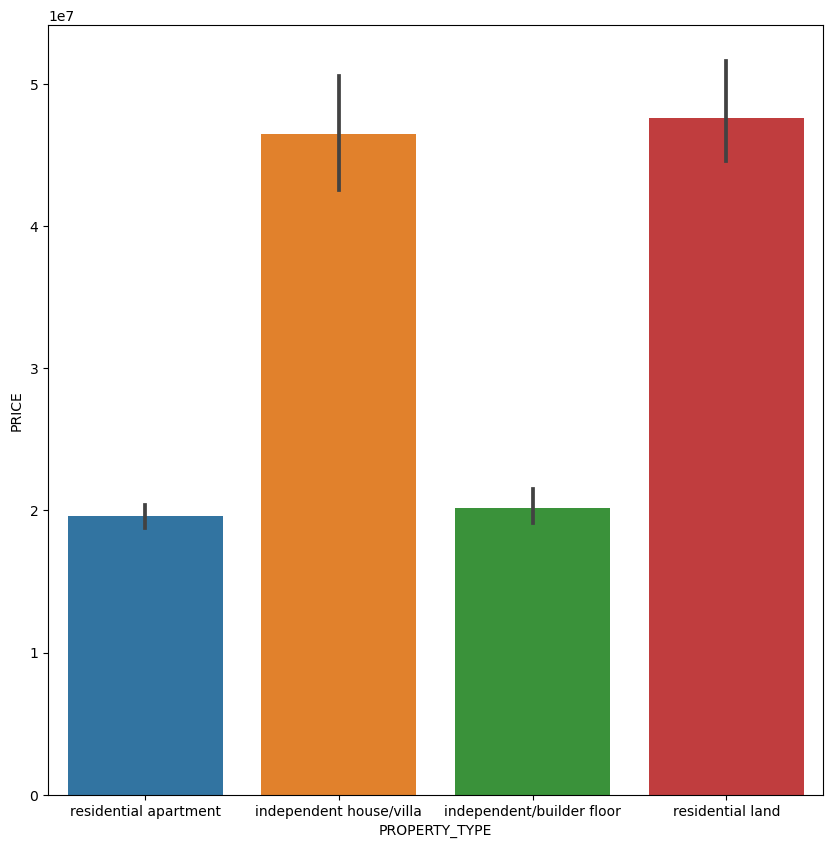

In [8]:
plt.figure(figsize=(10, 10))
sns.barplot(x = df['PROPERTY_TYPE'] , y =df['PRICE'])

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE'>

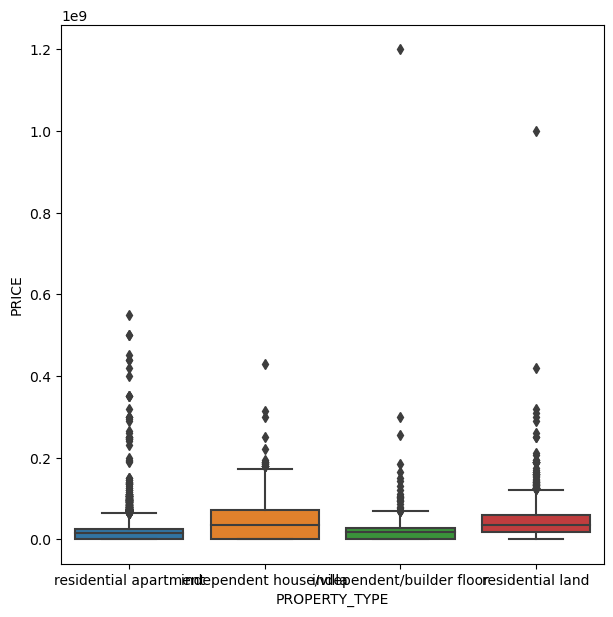

In [9]:
plt.figure(figsize=(7, 7))
sns.boxplot(x = df['PROPERTY_TYPE'] , y =df['PRICE'])

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE'>

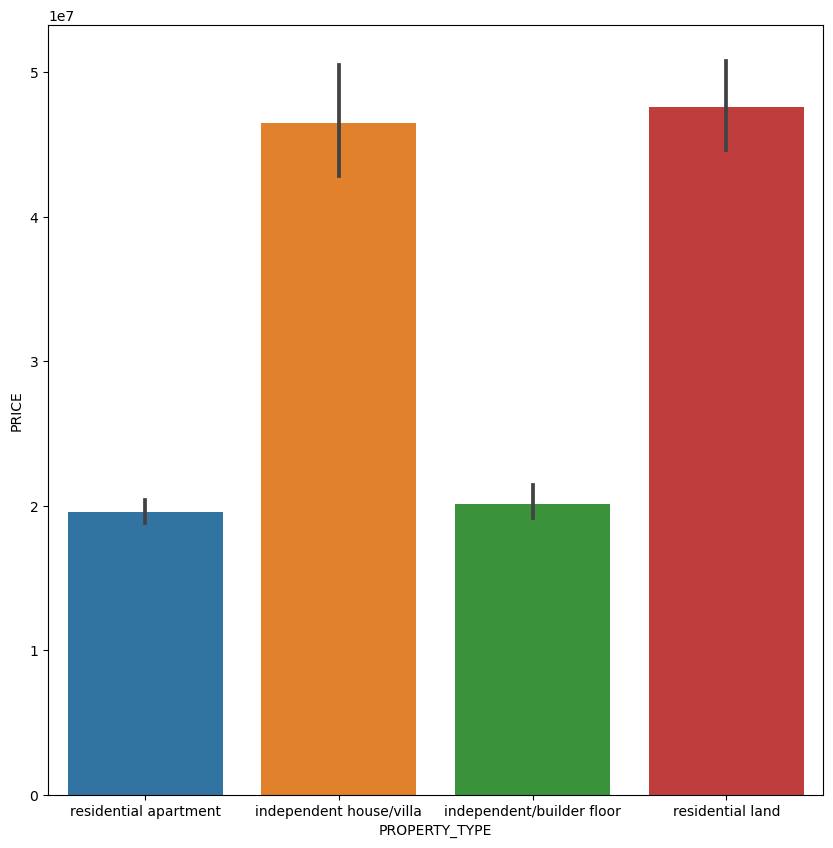

In [10]:
plt.figure(figsize=(10, 10))
sns.barplot(x = df['PROPERTY_TYPE'] , y =df['PRICE'])

<Axes: xlabel='PRICE_SQFT', ylabel='PROPERTY_TYPE'>

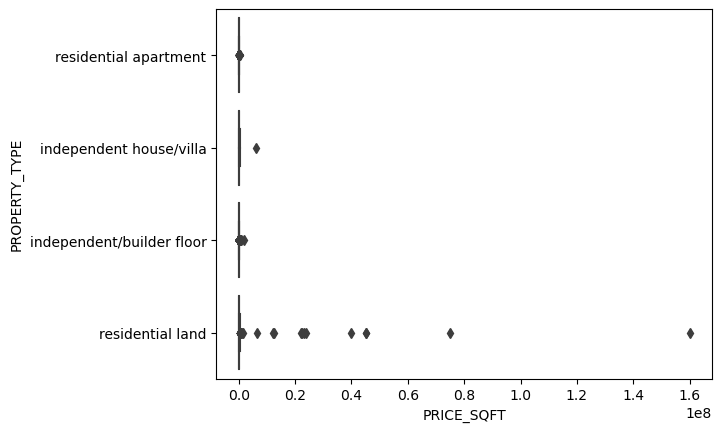

In [11]:
sns.boxplot(x = df['PRICE_SQFT'] , y =df['PROPERTY_TYPE'])

In [12]:
df=df[df['PRICE_SQFT'] != '255725']

<Axes: xlabel='PRICE_SQFT', ylabel='PROPERTY_TYPE'>

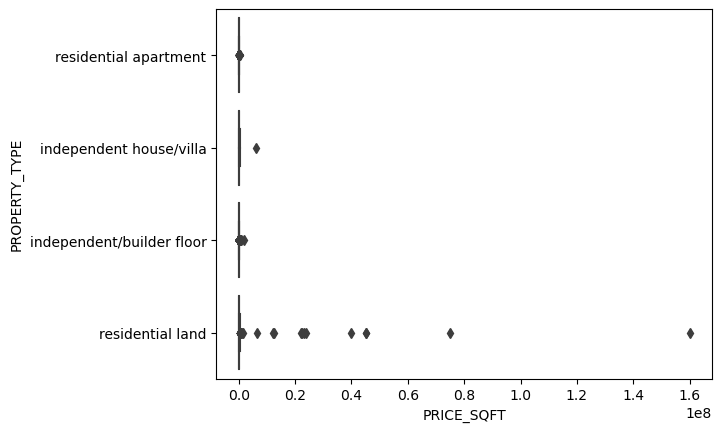

In [13]:
sns.boxplot(x = df['PRICE_SQFT'] , y =df['PROPERTY_TYPE'])

In [14]:
df[(df['PROPERTY_TYPE'] == 'residential land') & (df['PRICE'] >5)].sample(5)

SPID                        PROP_ID     CITY       PRICE  \
8083  70876428  https://99acres.com/I70876428  gurgaon  37800000.0   
9516  68248548  https://99acres.com/I68248548  gurgaon  71500000.0   
6161  70554066  https://99acres.com/U70554066  gurgaon  22000000.0   
3364  70157992  https://99acres.com/U70157992  gurgaon   9801000.0   
8737  70598478  https://99acres.com/M70598478  gurgaon  47000000.0   

      PRICE_SQFT    AREA  TOTAL_LANDMARK_COUNT  \
8083    105000.0  3240.0                  12.0   
9516    130000.0  4950.0                   9.0   
6161    152000.0  1305.0                  15.0   
3364     81000.0  1089.0                   6.0   
8737    182170.0  2322.0                  45.0   

                                       PROP_HEADING  \
8083   residential land / plot in sector 85 gurgaon   
9516  residential land / plot in sector 108 gurgaon   
6161  residential land / plot in sector 102 gurgaon   
3364   residential land / plot in sector 95 gurgaon   
8737   residential land / plot in sector 57 gurgaon   

                                            DESCRIPTION     PROPERTY_TYPE  \
8083  plots 240-1000 sqyd available 4 sale, sec-82/8...  residential land   
9516  its a 2side open 550 sq yd plot just near entr...  residential land   
6161  well maintend plotting scheme and good rates a...  residential land   
3364  check out this plot for sale in sector 95 gurg...  residential land   
8737  plot located in sector 57, you can built build...  residential land   

            FURNISH  FACING                    AGE TOTAL_FLOOR  BEDROOM_NUM  \
8083  not available       5  0-1 Year Old Property    mid rise          NaN   
9516  not available       3  0-1 Year Old Property    mid rise          NaN   
6161  not available       5  0-1 Year Old Property    mid rise          NaN   
3364  not available       0  0-1 Year Old Property    low rise          NaN   
8737  not available       4  0-1 Year Old Property    mid rise          NaN   

                     PROP_NAME  BALCONY_NUM FLOOR_NUM   LATITUDE  LOGNITUDE  \
8083  vatika inxt plots sec 85          NaN  low rise  28.401311  76.951343   
9516   experion the westerlies          NaN  low rise  28.510599  76.988560   
6161       adani oyster greens          NaN  low rise  28.481363  76.972711   
3364            jms the nation          NaN  low rise  28.414200  76.911570   
8737                       NaN          NaN  low rise  28.423441  77.076593   

      BHK_BED       LOCALITY_NAME             BUILDING_NAME  \
8083     85.0   sector 85 gurgaon  vatika inxt plots sec 85   
9516    108.0  sector 108 gurgaon   experion the westerlies   
6161    102.0  sector 102 gurgaon       adani oyster greens   
3364     95.0   sector 95 gurgaon            jms the nation   
8737     57.0   sector 57 gurgaon                       NaN   

                  SOCIETY_NAME   ADDRESS  TRNSPORTATION  ACCOMODATION  \
8083  vatika inxt plots sec 85    sec 85              0             0   
9516   experion the westerlies  a3 block              1             1   
6161       adani oyster greens       NaN              0             1   
3364            jms the nation       NaN              1             0   
8737                       NaN       121              0             1   

      LEISURE  EDUCATION  HEALTH  OTHER  AMENITIES_SCORE  LANDMARKS_CLUSTER  \
8083        1          0       0      7                5                  1   
9516        1          3       1      0               18                  1   
6161        2          2       2      2               24                  1   
3364        1          2       1      1                0                  1   
8737        1          0      13      2               13                  0   

      LANDMARKS_N_SCORES_CLUSTER  
8083                           0  
9516                           0  
6161                           0  
3364                           0  
8737                           0

In [15]:
df[df['PRICE']==.200000e+09	]

SPID                        PROP_ID     CITY        PRICE  \
9985  70253960  https://99acres.com/D70253960  gurgaon  200000000.0   

      PRICE_SQFT    AREA  TOTAL_LANDMARK_COUNT  \
9985     40000.0  5800.0                  12.0   

                         PROP_HEADING                         DESCRIPTION  \
9985  4 bhk flat in sector 42 gurgaon  a good location apartment for sale   

              PROPERTY_TYPE        FURNISH  FACING                    AGE  \
9985  residential apartment  Semifurnished       1  1-5 Year Old Property   

     TOTAL_FLOOR  BEDROOM_NUM        PROP_NAME  BALCONY_NUM  FLOOR_NUM  \
9985   high rise          4.0  dlf the aralias          3.0  high rise   

      LATITUDE  LOGNITUDE  BHK_BED      LOCALITY_NAME    BUILDING_NAME  \
9985  28.45919   77.10224      4.0  sector 42 gurgaon  dlf the aralias   

         SOCIETY_NAME ADDRESS  TRNSPORTATION  ACCOMODATION  LEISURE  \
9985  dlf the aralias     221              1             1        1   

      EDUCATION  HEALTH  OTHER  AMENITIES_SCORE  LANDMARKS_CLUSTER  \
9985          2       0      1               53                  1   

      LANDMARKS_N_SCORES_CLUSTER  
9985                           2

<Axes: xlabel='AREA', ylabel='PRICE'>

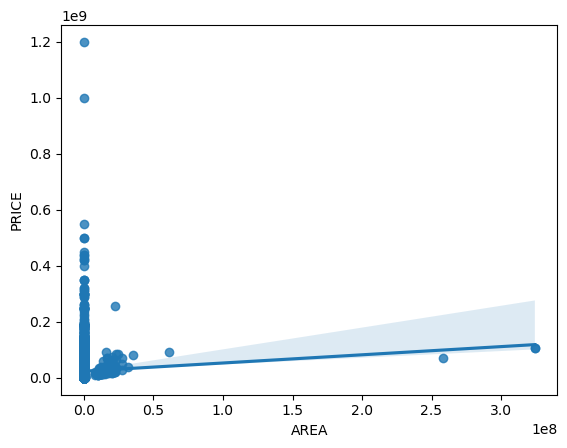

In [16]:
sns.regplot(df, x="AREA", y="PRICE")

<Axes: xlabel='AREA', ylabel='PRICE'>

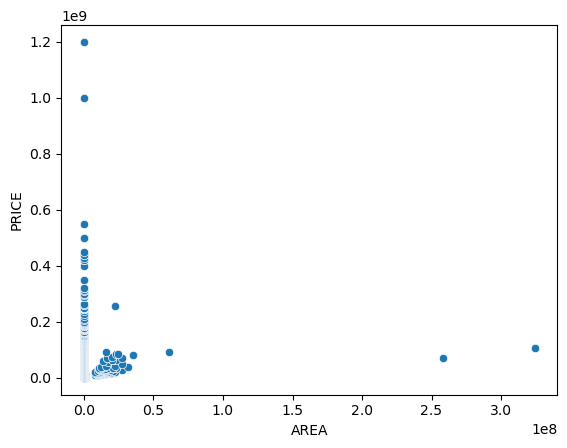

In [17]:
sns.scatterplot(data=df, x="AREA", y="PRICE")

In [18]:
df[df['AREA'] > 5000]

SPID                        PROP_ID     CITY         PRICE  \
33     71017380  https://99acres.com/J71017380  gurgaon  1.400000e+04   
56     70743820  https://99acres.com/N70743820  gurgaon  1.500000e+04   
87     70769006  https://99acres.com/T70769006  gurgaon  1.700000e+04   
116    70656474  https://99acres.com/R70656474  gurgaon  1.900000e+04   
295    70124072  https://99acres.com/W70124072  gurgaon  2.600000e+04   
...         ...                            ...      ...           ...   
10026  21691299  https://99acres.com/Q21691299  gurgaon  4.500000e+08   
10027  70270684  https://99acres.com/F70270684  gurgaon  5.000000e+08   
10028  70877280  https://99acres.com/B70877280  gurgaon  5.000000e+08   
10029  23798278  https://99acres.com/G23798278  gurgaon  5.500000e+08   
10030  70231990  https://99acres.com/T70231990  gurgaon  1.000000e+09   

        PRICE_SQFT      AREA  TOTAL_LANDMARK_COUNT  \
33             0.0   51922.0                  10.0   
56             0.0  517967.0                   7.0   
87             0.0   59612.0                  10.0   
116           27.0    7491.0                  15.0   
295            0.0   64451.0                  15.0   
...            ...       ...                   ...   
10026      49046.0    9175.0                  15.0   
10027      67567.0    7400.0                  15.0   
10028      67851.0    7369.0                  15.0   
10029      43478.0   11500.0                  15.0   
10030  160000000.0  272250.0                   6.0   

                                       PROP_HEADING  \
33                 2 bhk flat in sector 37d gurgaon   
56                              2 bhk flat in sohna   
87                 2 bhk flat in sector 37d gurgaon   
116                2 bhk flat in sector 37d gurgaon   
295                2 bhk flat in sector 37d gurgaon   
...                                             ...   
10026               5 bhk flat in sector 42 gurgaon   
10027               4 bhk flat in sector 42 gurgaon   
10028               4 bhk flat in sector 42 gurgaon   
10029               5 bhk flat in sector 42 gurgaon   
10030  residential land / plot in sector 78 gurgaon   

                                             DESCRIPTION  \
33     explore this amicable signature global the mil...   
56     semi furnished flat for rent in serenas it's a...   
87                       ready to move property for rent   
116    this lovely 2 bhk apartment for rent in sector...   
295    find this 2 bhk apartment for rent in sector 3...   
...                                                  ...   
10026  duplex house, corner unit is available at high...   
10027  dlf the camellias is one of the most popular d...   
10028  luxury deals by expert \n\n7400 sq ft exclusiv...   
10029  for sale - penthouse, in dlf - the magnolias, ...   
10030  available for sale 6.25 acres rate of 16cr per...   

               PROPERTY_TYPE        FURNISH  FACING                     AGE  \
33     residential apartment    Unfurnished       6  5-10 Year Old Property   
56     residential apartment  Semifurnished       5  5-10 Year Old Property   
87     residential apartment  Semifurnished       5   0-1 Year Old Property   
116    residential apartment  Semifurnished       3  5-10 Year Old Property   
295    residential apartment  Semifurnished       5  5-10 Year Old Property   
...                      ...            ...     ...                     ...   
10026  residential apartment  Semifurnished       5   0-1 Year Old Property   
10027  residential apartment      Furnished       3   0-1 Year Old Property   
10028  residential apartment  not available       1   1-5 Year Old Property   
10029  residential apartment  Semifurnished       5   0-1 Year Old Property   
10030       residential land  not available       3   0-1 Year Old Property   

      TOTAL_FLOOR  BEDROOM_NUM                            PROP_NAME  \
33      high rise          2.0       signature global the millennia   
56      high

In [19]:
df[df['AREA'] ==272250.0]

SPID                        PROP_ID     CITY         PRICE  \
10030  70231990  https://99acres.com/T70231990  gurgaon  1.000000e+09   

        PRICE_SQFT      AREA  TOTAL_LANDMARK_COUNT  \
10030  160000000.0  272250.0                   6.0   

                                       PROP_HEADING  \
10030  residential land / plot in sector 78 gurgaon   

                                             DESCRIPTION     PROPERTY_TYPE  \
10030  available for sale 6.25 acres rate of 16cr per...  residential land   

             FURNISH  FACING                    AGE TOTAL_FLOOR  BEDROOM_NUM  \
10030  not available       3  0-1 Year Old Property    mid rise          NaN   

                                 PROP_NAME  BALCONY_NUM FLOOR_NUM   LATITUDE  \
10030  shikopur village sector 78, gurgaon          NaN  low rise  28.373276   

       LOGNITUDE  BHK_BED      LOCALITY_NAME  \
10030  76.972947     78.0  sector 78 gurgaon   

                             BUILDING_NAME  \
10030  shikopur village sector 78, gurgaon   

                              SOCIETY_NAME                        ADDRESS  \
10030  shikopur village sector 78, gurgaon  1.25 acres and 6.25acres land   

       TRNSPORTATION  ACCOMODATION  LEISURE  EDUCATION  HEALTH  OTHER  \
10030              0             0        0          0       0      3   

       AMENITIES_SCORE  LANDMARKS_CLUSTER  LANDMARKS_N_SCORES_CLUSTER  
10030               24                  1                           0

In [20]:
cols_for_multivar=["PRICE" ,"PRICE_SQFT", "AREA", "TOTAL_LANDMARK_COUNT" ,"PROPERTY_TYPE" ,"FURNISH" ,"FACING" ,"AGE" , "BEDROOM_NUM" , "PROP_NAME" ,"BALCONY_NUM" ,"FLOOR_NUM" ,"AMENITIES_SCORE"]

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

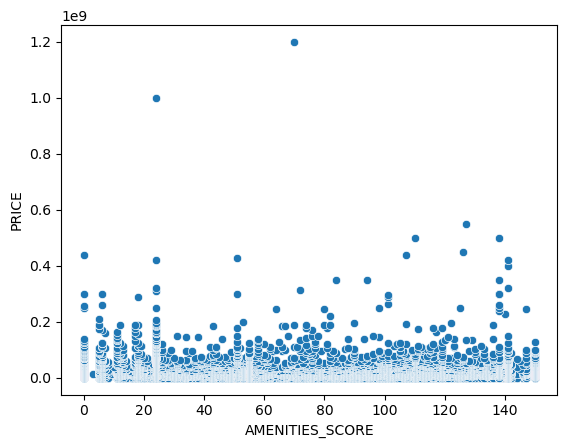

In [21]:
sns.scatterplot(df, x ='AMENITIES_SCORE' ,y ='PRICE')

In [22]:
df['AMENITIES_SCORE'].max()

150

In [23]:
df

SPID                        PROP_ID     CITY         PRICE  \
0      70480214  https://99acres.com/J70480214  gurgaon  5.500000e+03   
1      70794112  https://99acres.com/U70794112  gurgaon  7.000000e+03   
2      70607360  https://99acres.com/O70607360  gurgaon  7.500000e+03   
3      70794132  https://99acres.com/F70794132  gurgaon  8.500000e+03   
4      69621256  https://99acres.com/S69621256  gurgaon  8.500000e+03   
...         ...                            ...      ...           ...   
10027  70270684  https://99acres.com/F70270684  gurgaon  5.000000e+08   
10028  70877280  https://99acres.com/B70877280  gurgaon  5.000000e+08   
10029  23798278  https://99acres.com/G23798278  gurgaon  5.500000e+08   
10030  70231990  https://99acres.com/T70231990  gurgaon  1.000000e+09   
10031  69963388  https://99acres.com/X69963388  gurgaon  1.200000e+09   

        PRICE_SQFT      AREA  TOTAL_LANDMARK_COUNT  \
0             15.0     350.0                   3.0   
1             10.0     700.0                  15.0   
2             14.0     514.0                   3.0   
3              9.0     910.0                  15.0   
4              8.0     980.0                   3.0   
...            ...       ...                   ...   
10027      67567.0    7400.0                  15.0   
10028      67851.0    7369.0                  15.0   
10029      43478.0   11500.0                  15.0   
10030  160000000.0  272250.0                   6.0   
10031     843288.0    1423.0                   9.0   

                                            PROP_HEADING  \
0                       1 bhk flat in sector 107 gurgaon   
1                        1 bhk flat in sector 95 gurgaon   
2                       2 bhk flat in sector 107 gurgaon   
3                        2 bhk flat in sector 95 gurgaon   
4                        2 bhk flat in sector 95 gurgaon   
...                                                  ...   
10027                    4 bhk flat in sector 42 gurgaon   
10028                    4 bhk flat in sector 42 gurgaon   
10029                    5 bhk flat in sector 42 gurgaon   
10030       residential land / plot in sector 78 gurgaon   
10031  3 bhk independent builder floor in sector 89 g...   

                                             DESCRIPTION  \
0      very much demanding property at dwarka express...   
1      rof ananda , sector 95, near to wazirpur villa...   
2      cheap rent and best place and location at dwar...   
3      rof ananda , sector 95, near to wazirpur villa...   
4      find this 2 bhk apartment for rent in sector 9...   
...                                                  ...   
10027  dlf the camellias is one of the most popular d...   
10028  luxury deals by expert \n\n7400 sq ft exclusiv...   
10029  for sale - penthouse, in dlf - the magnolias, ...   
10030  available for sale 6.25 acres rate of 16cr per...   
10031  the newly constructed low rise floors with com...   

                   PROPERTY_TYPE        FURNISH  FACING  \
0          residential apartment    Unfurnished       5   
1          residential apartment  Semifurnished       3   
2          residential apartment    Unfurnished       5   
3          residential apartment  Semifurnished       3   
4          residential apartment    Unfurnished       1   
...                          ...            ...     ...   
10027      residential apartment      Furnished       3   
10028      residential apartment  not available       1   
10029      residential apartment  Semifurnished       5   
10030           residential land  not available       3   
10031  independent/builder floor  Semifurnished       3   

                          AGE TOTAL_FLOOR  BEDROOM_NUM  \
0       0-1 Year Old Property   high rise          1.0   
1       0-1 Year Old Property   high rise          1.0   
2      5-10 Year Old Property   high rise          2.0   
3       0-1 Year Old Property   high rise          2.0   
4       0-1 Year Old Property   high rise   

In [24]:
df['PROPERTY_TYPE'].value_counts()

residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: PROPERTY_TYPE, dtype: int64

In [26]:
cols_for_multivar

['PRICE',
 'PRICE_SQFT',
 'AREA',
 'TOTAL_LANDMARK_COUNT',
 'PROPERTY_TYPE',
 'FURNISH',
 'FACING',
 'AGE',
 'BEDROOM_NUM',
 'PROP_NAME',
 'BALCONY_NUM',
 'FLOOR_NUM',
 'AMENITIES_SCORE']

## PROPERTY_TYPE vs PRICE_SQFT

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE_SQFT'>

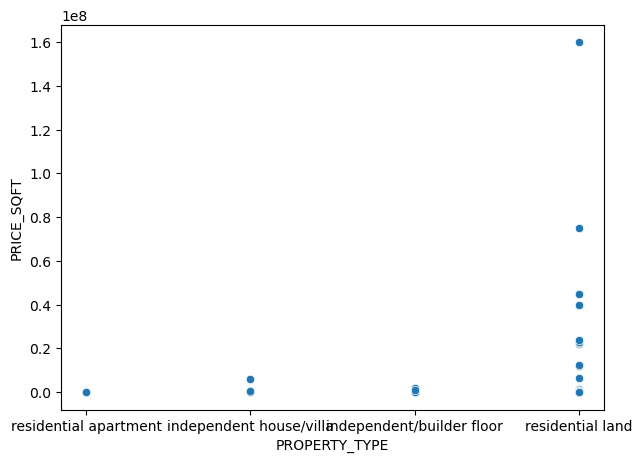

In [27]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="PROPERTY_TYPE", y="PRICE_SQFT")

#### Cearly we can see that residential land price sqft is quit higer and other property type price sqft looks good

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE_SQFT'>

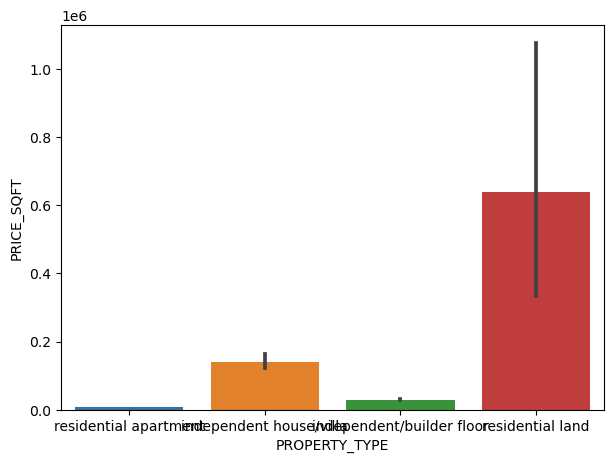

In [28]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="PROPERTY_TYPE", y="PRICE_SQFT")

In [29]:
df.sample(1)

SPID                        PROP_ID     CITY       PRICE  \
3585  70496390  https://99acres.com/V70496390  gurgaon  11000000.0   

      PRICE_SQFT    AREA  TOTAL_LANDMARK_COUNT  \
3585      7586.0  1450.0                   2.0   

                          PROP_HEADING  \
3585  2 bhk flat in sector 70a gurgaon   

                                            DESCRIPTION  \
3585  looking for a spacious and luxurious 2bhk apar...   

              PROPERTY_TYPE      FURNISH  FACING                     AGE  \
3585  residential apartment  Unfurnished       1  5-10 Year Old Property   

     TOTAL_FLOOR  BEDROOM_NUM               PROP_NAME  BALCONY_NUM FLOOR_NUM  \
3585   high rise          2.0  capital residences 360          3.0  mid rise   

       LATITUDE  LOGNITUDE  BHK_BED       LOCALITY_NAME  \
3585  28.383997  77.015303      2.0  sector 70a gurgaon   

               BUILDING_NAME            SOCIETY_NAME ADDRESS  TRNSPORTATION  \
3585  capital residences 360  capital residences 360     222              0   

      ACCOMODATION  LEISURE  EDUCATION  HEALTH  OTHER  AMENITIES_SCORE  \
3585             2        0          0       0      0              134   

      LANDMARKS_CLUSTER  LANDMARKS_N_SCORES_CLUSTER  
3585                  1                           3

In [30]:
# check outliers
df[df['PRICE_SQFT'] > 200000][['PRICE','PRICE_SQFT',"AREA" ,'PROP_HEADING','PROPERTY_TYPE','AGE','ADDRESS','SOCIETY_NAME','BUILDING_NAME']]

PRICE   PRICE_SQFT      AREA  \
3655   1.150000e+07    1437500.0    1800.0   
3788   1.200000e+07   12000000.0   43560.0   
3870   1.250000e+07   12500000.0   43560.0   
4087   1.350000e+07     217741.0     558.0   
4214   1.400000e+07     215384.0     585.0   
...             ...          ...       ...   
10014  3.150000e+08     315000.0    9000.0   
10015  3.200000e+08     313111.0    9198.0   
10023  4.300000e+08     420743.0    9198.0   
10030  1.000000e+09  160000000.0  272250.0   
10031  1.200000e+09     843288.0    1423.0   

                                            PROP_HEADING  \
3655         residential land / plot in sector-1 pataudi   
3788               residential land / plot in sohna road   
3870        residential land / plot in sohna palwal road   
4087        residential land / plot in sector 46 gurgaon   
4214                8 bedroom house in sector 38 gurgaon   
...                                                  ...   
10014                     7 bedroom house in dlf phase 1   
10015             residential land / plot in dlf phase 1   
10023                     9 bedroom house in dlf phase 1   
10030       residential land / plot in sector 78 gurgaon   
10031  3 bhk independent builder floor in sector 89 g...   

                   PROPERTY_TYPE                    AGE  \
3655            residential land  0-1 Year Old Property   
3788            residential land  0-1 Year Old Property   
3870            residential land  0-1 Year Old Property   
4087            residential land  0-1 Year Old Property   
4214     independent house/villa  1-5 Year Old Property   
...                          ...                    ...   
10014    independent house/villa  1-5 Year Old Property   
10015           residential land  0-1 Year Old Property   
10023    independent house/villa  0-1 Year Old Property   
10030           residential land  0-1 Year Old Property   
10031  independent/builder floor  1-5 Year Old Property   

                                                 ADDRESS  \
3655                                                 NaN   
3788                                                 001   
3870                                                0005   
4087            60 sq yd east facing plot demand 1.35 cr   
4214          65 sq yd, 8 rooms, 75k rent demand 1.40 cr   
...                                                  ...   
10014  for sale - super luxury 7 bedrooms duplex bung...   
10015                                                NaN   
10023                                                NaN   
10030                      1.25 acres and 6.25acres land   
10031                                                NaN   

                                            SOCIETY_NAME  \
3655                                  huda plots pataudi   
3788                                                 NaN   
3870                                                 NaN   
4087                                       rwa sector 46   
4214                                       sector 38 rwa   
...                                                  ...   
10014  arjun marg/ sector- 26 phase- 1/ golf course road   
10015                                                NaN   
10023                                                NaN   
10030                shikopur village sector 78, gurgaon   
10031                                      m3m soulitude   

                                           BUILDING_NAME  
3655                                  huda plots pataudi  
3788                                                 NaN  
3870                                                 NaN  
4087                                       rwa sector 46  
4214                                       sector 38 rwa  
...                                                  ...  
10014  arjun marg/ sector- 26 phase- 1/ golf course road  
10015                                                NaN  
10023                                                NaN  

## PROPERTY_TYPE vs AREA

<Axes: xlabel='PROPERTY_TYPE', ylabel='AREA'>

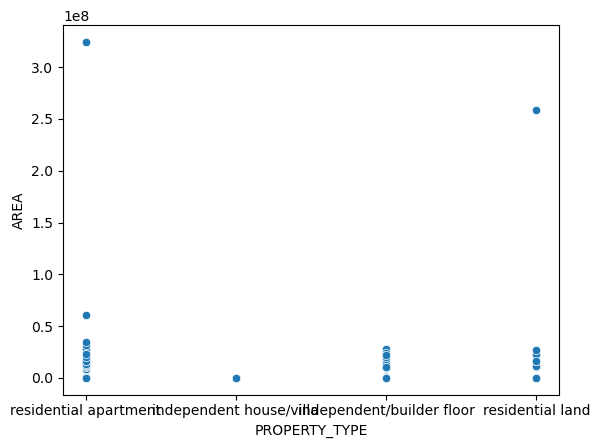

In [31]:
sns.scatterplot(data=df, x="PROPERTY_TYPE", y="AREA")

## PROPERTY_TYPE vs PRICE_SQFT

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE_SQFT'>

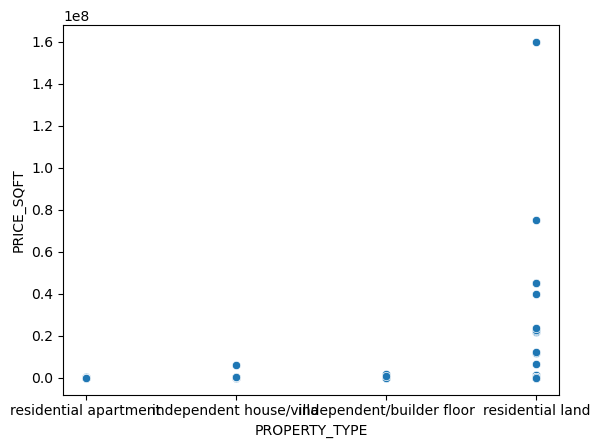

In [32]:
sns.scatterplot(data=df, x="PROPERTY_TYPE", y="PRICE_SQFT")

In [33]:
cols_for_multivar

['PRICE',
 'PRICE_SQFT',
 'AREA',
 'TOTAL_LANDMARK_COUNT',
 'PROPERTY_TYPE',
 'FURNISH',
 'FACING',
 'AGE',
 'BEDROOM_NUM',
 'PROP_NAME',
 'BALCONY_NUM',
 'FLOOR_NUM',
 'AMENITIES_SCORE']

## FURNISH vs PRICE

<Axes: xlabel='FURNISH', ylabel='PRICE'>

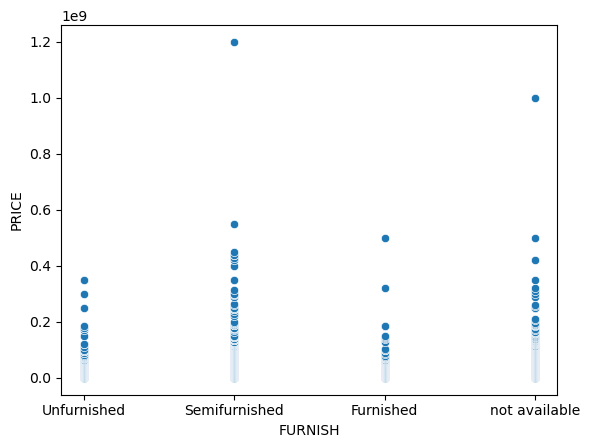

In [34]:
sns.scatterplot(data=df, x="FURNISH", y="PRICE")

## FURNISH vs PROPERTY_TYPE

<Axes: xlabel='FURNISH', ylabel='PROPERTY_TYPE'>

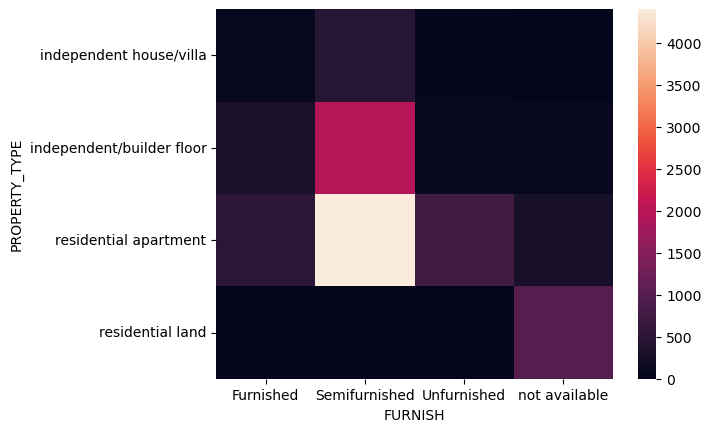

In [35]:
sns.heatmap(pd.crosstab(df['PROPERTY_TYPE'],df['FURNISH']))

<Axes: xlabel='FURNISH', ylabel='PRICE'>

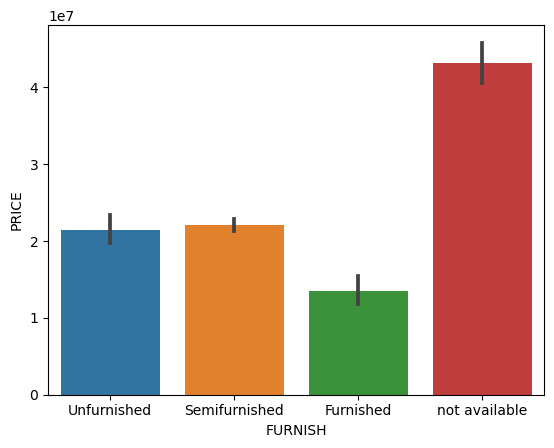

In [36]:
sns.barplot(data=df, x="FURNISH", y="PRICE")

## property type vs price

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE'>

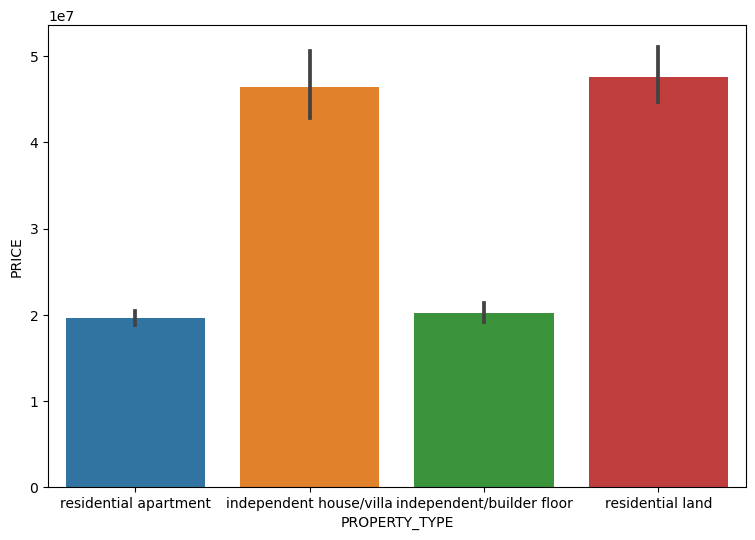

In [37]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x="PROPERTY_TYPE", y="PRICE")

<Axes: xlabel='PRICE', ylabel='PROPERTY_TYPE'>

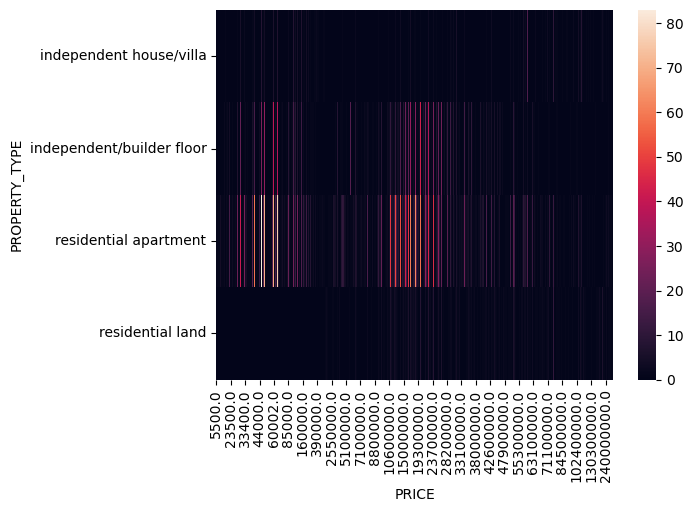

In [38]:

sns.heatmap(pd.crosstab(df['PROPERTY_TYPE'],df['PRICE']))

## FACING

<Axes: xlabel='PROPERTY_TYPE', ylabel='FACING'>

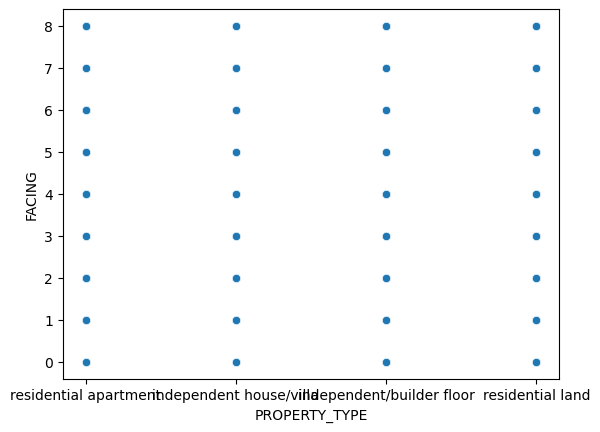

In [39]:
sns.scatterplot(data = df , x = 'PROPERTY_TYPE', y ='FACING')

<Axes: xlabel='PROPERTY_TYPE', ylabel='FACING'>

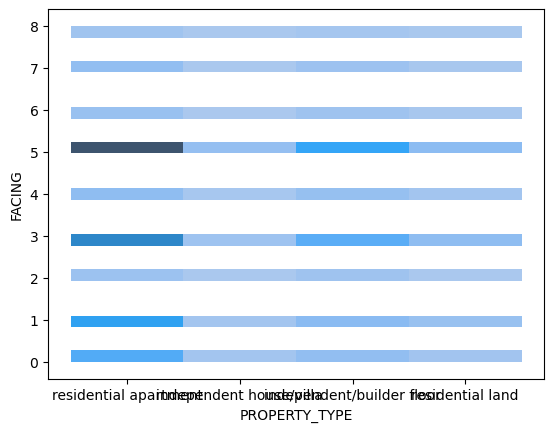

In [40]:
sns.histplot(data = df , x = 'PROPERTY_TYPE', y ='FACING')

<Axes: xlabel='AGE', ylabel='PROPERTY_TYPE'>

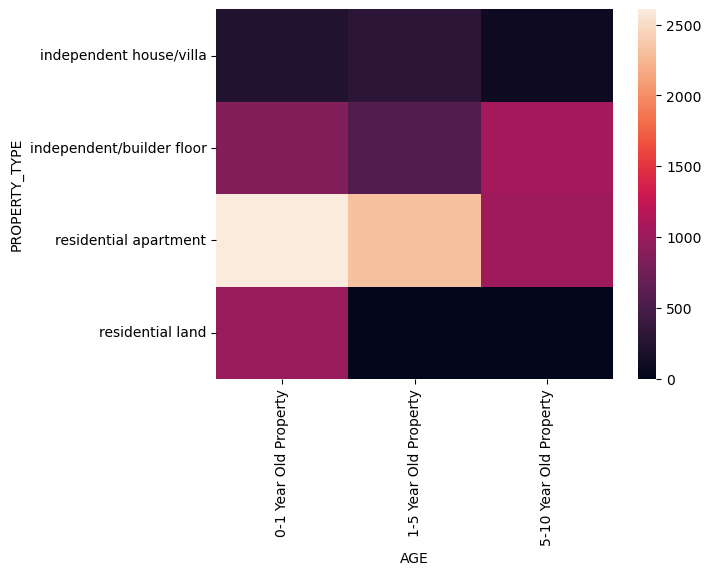

In [41]:
sns.heatmap(pd.crosstab (df['PROPERTY_TYPE'],df['AGE']))

<Axes: xlabel='AGE', ylabel='PROPERTY_TYPE'>

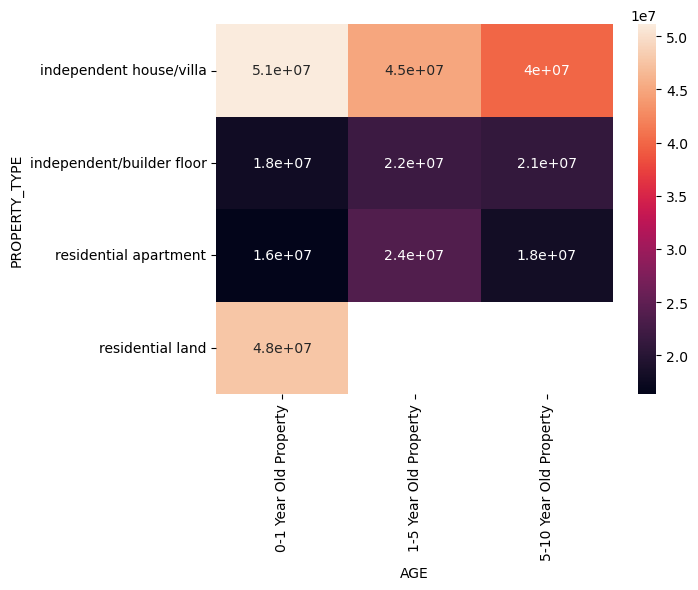

In [42]:
sns.heatmap(pd.pivot_table(df,index='PROPERTY_TYPE',columns='AGE',values='PRICE',aggfunc='mean'),annot=True)

<Axes: xlabel='BEDROOM_NUM', ylabel='PROPERTY_TYPE'>

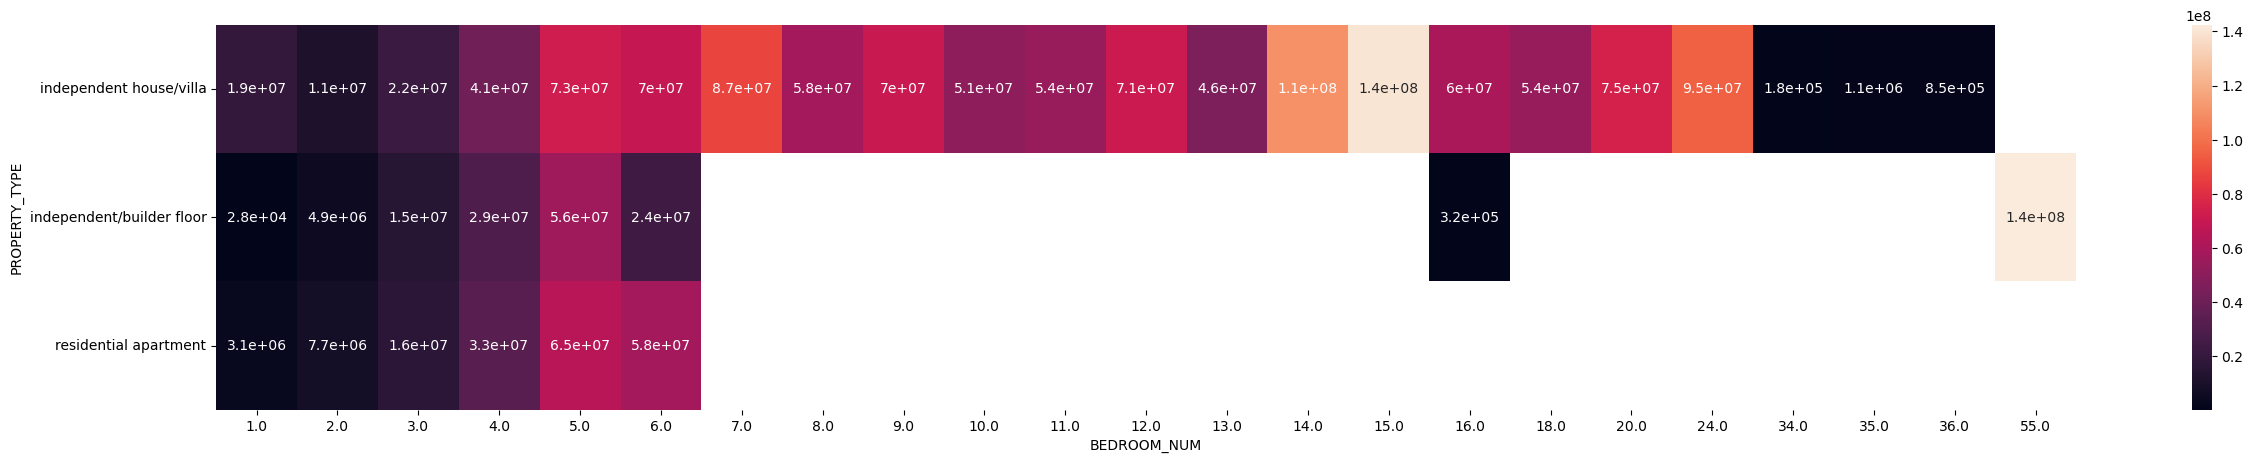

In [43]:
plt.figure(figsize=(30,5))
sns.heatmap(pd.pivot_table(df,index='PROPERTY_TYPE',columns='BEDROOM_NUM',values='PRICE',aggfunc='mean'),annot=True)

## Property type vs Bedroom

<Axes: xlabel='PROPERTY_TYPE', ylabel='BEDROOM_NUM'>

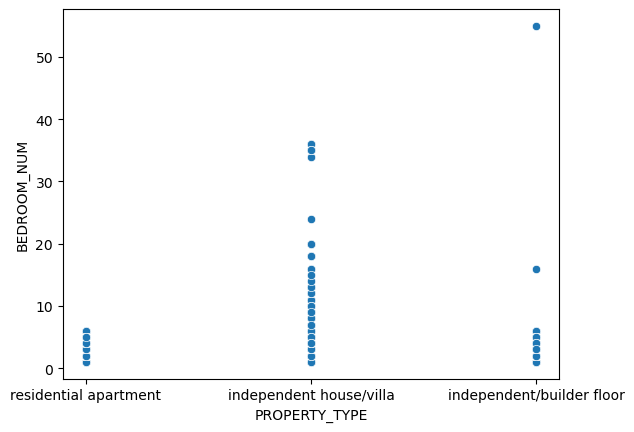

In [44]:
sns.scatterplot(data = df  , x='PROPERTY_TYPE' ,y = 'BEDROOM_NUM' )

<Axes: xlabel='PROPERTY_TYPE', ylabel='BEDROOM_NUM'>

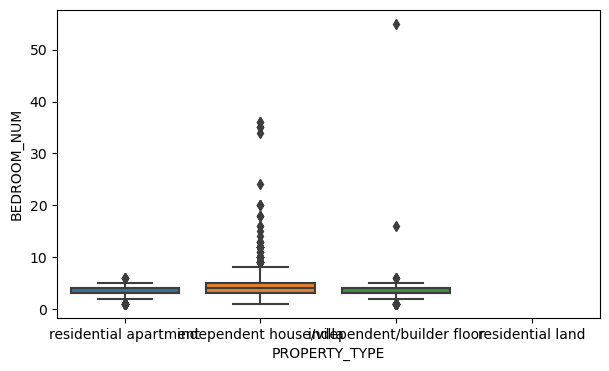

In [45]:
plt.figure(figsize = (7,4))
sns.boxplot(x=df['PROPERTY_TYPE'] ,y = df['BEDROOM_NUM'] )

In [46]:
## Checking outliers
df[df['BEDROOM_NUM']>=10]##[['PROPERTY_TYPE','FLOOR_NUM','BEDROOM_NUM']]

SPID                        PROP_ID     CITY        PRICE  \
2514   70761772  https://99acres.com/B70761772  gurgaon     175000.0   
2587   70288984  https://99acres.com/Y70288984  gurgaon     225000.0   
2623   70177308  https://99acres.com/G70177308  gurgaon     250000.0   
2662   70236576  https://99acres.com/K70236576  gurgaon     300000.0   
2669   70514994  https://99acres.com/R70514994  gurgaon     325000.0   
2679   68543130  https://99acres.com/P68543130  gurgaon     350000.0   
2682   70399122  https://99acres.com/O70399122  gurgaon     360000.0   
2686   70289126  https://99acres.com/C70289126  gurgaon     400000.0   
2689   70873218  https://99acres.com/J70873218  gurgaon     450000.0   
2702   70921750  https://99acres.com/I70921750  gurgaon     600000.0   
2703   70723708  https://99acres.com/Y70723708  gurgaon     600000.0   
2715   70284162  https://99acres.com/I70284162  gurgaon     800000.0   
2722   70716848  https://99acres.com/R70716848  gurgaon    1100000.0   
2723   70845522  https://99acres.com/S70845522  gurgaon    1200000.0   
2724   70921432  https://99acres.com/C70921432  gurgaon    1250000.0   
5150   70405008  https://99acres.com/W70405008  gurgaon   17500000.0   
5271   44856261  https://99acres.com/H44856261  gurgaon   18000000.0   
5430   67141134  https://99acres.com/Z67141134  gurgaon   18600000.0   
5507   70372676  https://99acres.com/C70372676  gurgaon   19000000.0   
5855   67178280  https://99acres.com/V67178280  gurgaon   20500000.0   
5941   67047662  https://99acres.com/A67047662  gurgaon   21000000.0   
6261   68982530  https://99acres.com/A68982530  gurgaon   22500000.0   
7136   70482576  https://99acres.com/T70482576  gurgaon   28000000.0   
8448   70344250  https://99acres.com/S70344250  gurgaon   42500000.0   
8799   70800218  https://99acres.com/M70800218  gurgaon   48000000.0   
8800   67823350  https://99acres.com/O67823350  gurgaon   48000000.0   
8870   70718144  https://99acres.com/P70718144  gurgaon   50000000.0   
9071   69197908  https://99acres.com/Q69197908  gurgaon   55000000.0   
9279   69908864  https://99acres.com/R69908864  gurgaon   60900000.0   
9420   70375000  https://99acres.com/S70375000  gurgaon   67500000.0   
9437   70394250  https://99acres.com/F70394250  gurgaon   68000000.0   
9506   70988818  https://99acres.com/E70988818  gurgaon   71000000.0   
9525   70905694  https://99acres.com/K70905694  gurgaon   72000000.0   
9559   70906552  https://99acres.com/B70906552  gurgaon   75000000.0   
9560   69044408  https://99acres.com/K69044408  gurgaon   75000000.0   
9561   70596160  https://99acres.com/U70596160  gurgaon   75000000.0   
9564   70596332  https://99acres.com/Y70596332  gurgaon   75000000.0   
9584   64189834  https://99acres.com/J64189834  gurgaon   75000000.0   
9604   70879152  https://99acres.com/L70879152  gurgaon   77500000.0   
9649   70148468  https://99acres.com/I70148468  gurgaon   82500000.0   
9663   70359870  https://99acres.com/R70359870  gurgaon   84900000.0   
9674   70385236  https://99acres.com/Y70385236  gurgaon   85000000.0   
9714   70636646  https://99acres.com/G70636646  gurgaon   91500000.0   
9729   70038696  https://99acres.com/F70038696  gurgaon   93500000.0   
9745   68532944  https://99acres.com/S68532944  gurgaon   95000000.0   
9746   70092106  https://99acres.com/F70092106  gurgaon   95000000.0   
9799   70359024  https://99acres.com/A70359024  gurgaon  105000000.0   
9825   70089736  https://99acres.com/E70089736  gurgaon  108000000.0   
9827   70091598  https://99acres.com/K70091598  gurgaon  110000000.0   
9837   68542650  https://99acres.com/S68542650  gurgaon  110000000.0   
9840   70219330  https://99acres.com/M70219330  gurgaon  110000000.0   
9869   70268910  https://99acres.com/J70268910  gurgaon  120000000.0   
9923   70542904  https://99acres.com/K70542904  gurgaon  140000000.0   
9927   70450364  https://99acres.com/T70450364  gurgaon  142500000.0   
10011  70962732  https://99acres.com/B70962732  gur

## bedroom vs Price

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='PRICE', ylabel='BEDROOM_NUM'>

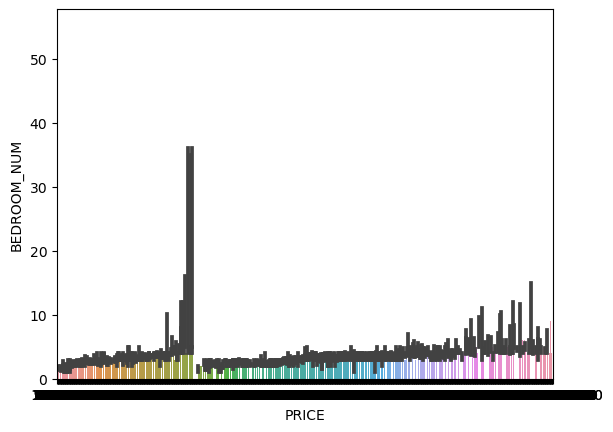

In [47]:
sns.barplot(data = df ,x = 'PRICE' ,y = 'BEDROOM_NUM' )

<Axes: xlabel='PRICE', ylabel='BEDROOM_NUM'>

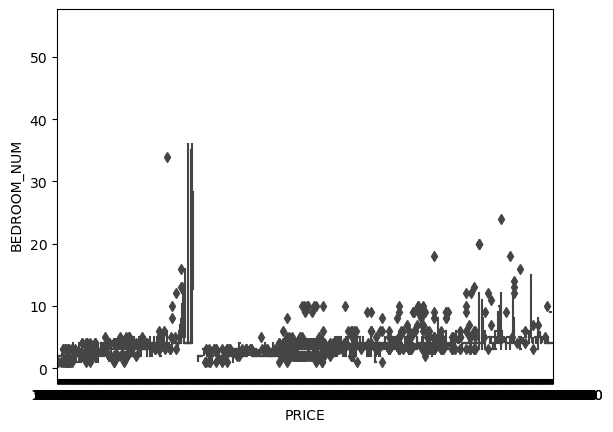

In [48]:
sns.boxplot(x = df['PRICE'] ,y = df['BEDROOM_NUM'] )

<Axes: xlabel='PRICE', ylabel='BEDROOM_NUM'>

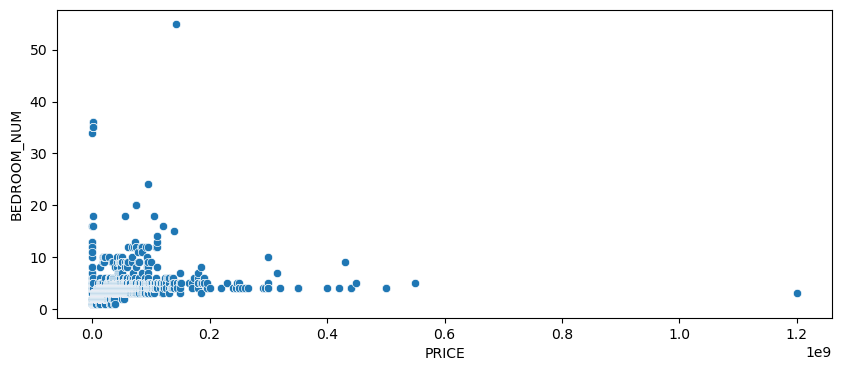

In [49]:
plt.figure(figsize=(10,4))
sns.scatterplot(data = df ,x = 'PRICE' ,y = 'BEDROOM_NUM' )

## Property ype vs floornumber

<Axes: xlabel='TOTAL_FLOOR', ylabel='PROPERTY_TYPE'>

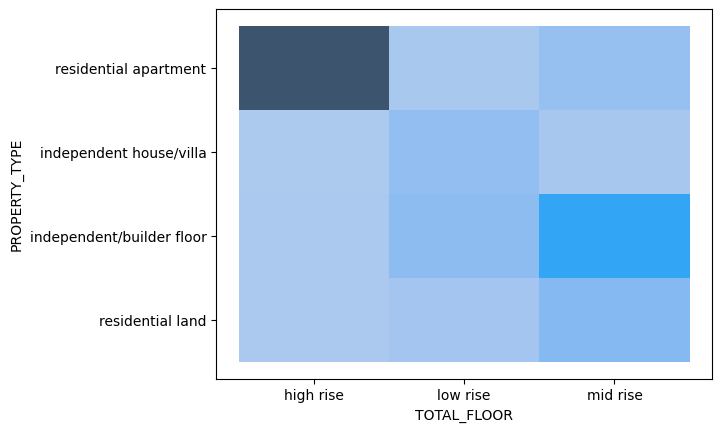

In [50]:
sns.histplot(data = df ,x = 'TOTAL_FLOOR' ,y = 'PROPERTY_TYPE' )

<Axes: xlabel='FURNISH', ylabel='PROPERTY_TYPE'>

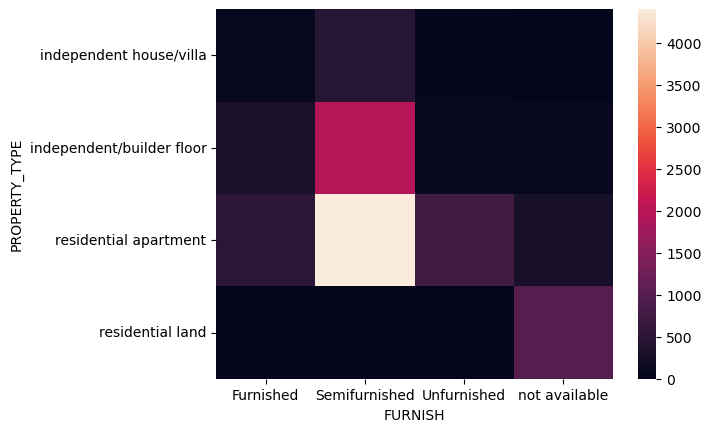

In [51]:
sns.heatmap(pd.crosstab(df['PROPERTY_TYPE'],df['FURNISH']))

<Axes: xlabel='FURNISH', ylabel='PROPERTY_TYPE'>

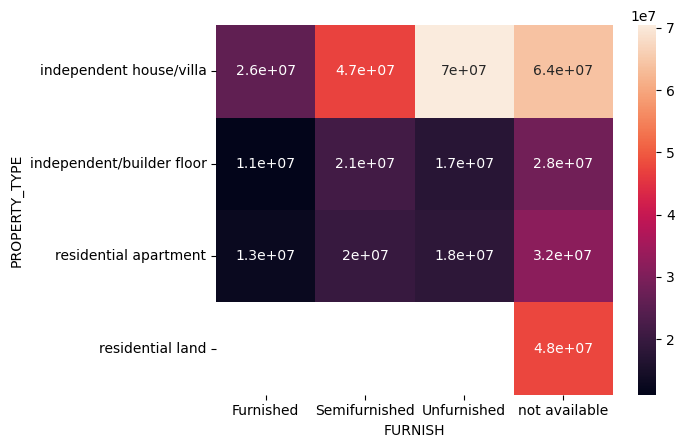

In [52]:
sns.heatmap(pd.pivot_table(df,index='PROPERTY_TYPE',columns='FURNISH',values='PRICE',aggfunc='mean'),annot=True)

<Axes: xlabel='PROPERTY_TYPE', ylabel='AMENITIES_SCORE'>

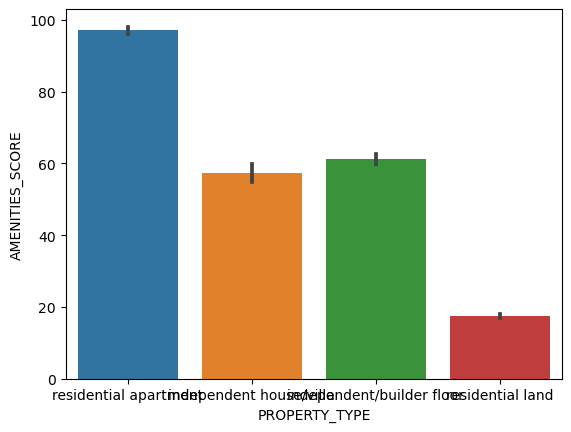

In [53]:
sns.barplot(x=df['PROPERTY_TYPE'],y=df['AMENITIES_SCORE'])

<Axes: xlabel='PROPERTY_TYPE', ylabel='AMENITIES_SCORE'>

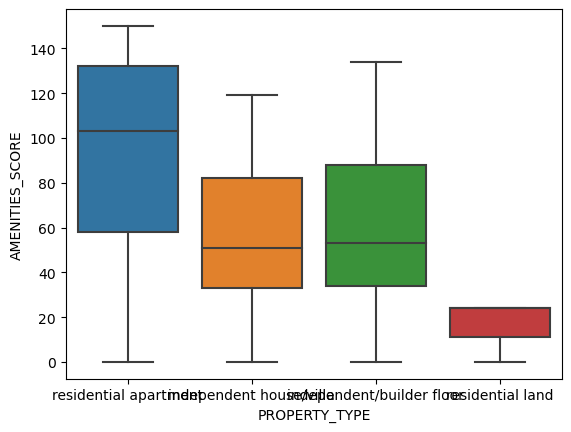

In [54]:
sns.boxplot(x=df['PROPERTY_TYPE'],y=df['AMENITIES_SCORE'])

<Axes: xlabel='PRICE', ylabel='AMENITIES_SCORE'>

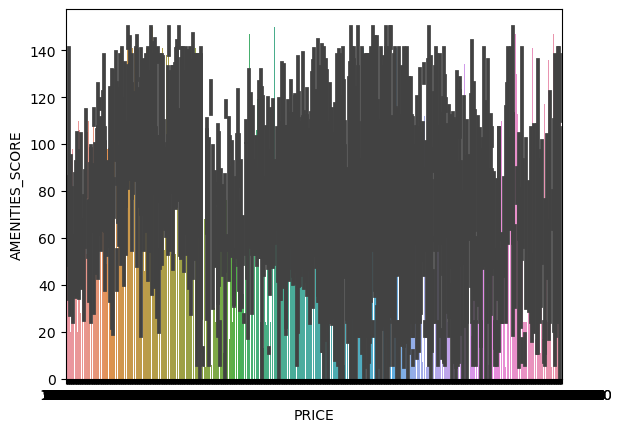

In [55]:
sns.barplot(x=df['PRICE'],y=df['AMENITIES_SCORE'])

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

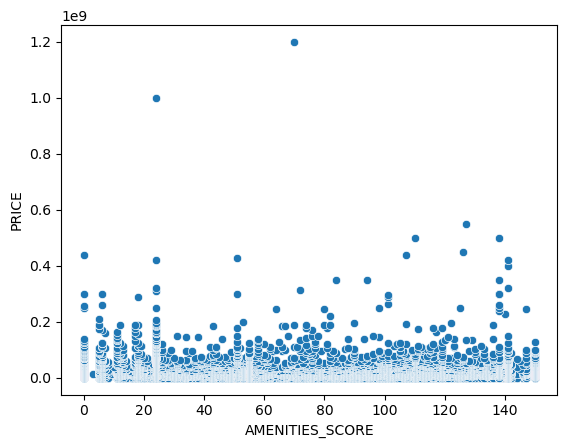

In [56]:
sns.scatterplot(x=df['AMENITIES_SCORE'],y=df['PRICE'])

In [57]:
df[df['AMENITIES_SCORE']>=150]

SPID                        PROP_ID     CITY        PRICE  \
156   67117460  https://99acres.com/P67117460  gurgaon      21000.0   
267   67127278  https://99acres.com/B67127278  gurgaon      25000.0   
269   70215840  https://99acres.com/G70215840  gurgaon      25000.0   
320   70228700  https://99acres.com/B70228700  gurgaon      27000.0   
337   70228762  https://99acres.com/H70228762  gurgaon      27999.0   
...        ...                            ...      ...          ...   
9743  70592854  https://99acres.com/U70592854  gurgaon   95000000.0   
9763  70734458  https://99acres.com/O70734458  gurgaon   98000000.0   
9765  70624134  https://99acres.com/H70624134  gurgaon   98000000.0   
9768  70022864  https://99acres.com/N70022864  gurgaon   99000000.0   
9901  70738298  https://99acres.com/L70738298  gurgaon  130000000.0   

      PRICE_SQFT    AREA  TOTAL_LANDMARK_COUNT  \
156         13.0  1534.0                   6.0   
267         14.0  1760.0                  11.0   
269         20.0  1250.0                  16.0   
320         56.0   482.0                  34.0   
337         37.0   750.0                  34.0   
...          ...     ...                   ...   
9743     18634.0  5098.0                   9.0   
9763     13066.0  7500.0                  10.0   
9765     25257.0  3880.0                   9.0   
9768     23571.0  4200.0                  11.0   
9901     15294.0  8500.0                  10.0   

                          PROP_HEADING  \
156   2 bhk flat in sector 107 gurgaon   
267   3 bhk flat in sector 106 gurgaon   
269    2 bhk flat in sector 81 gurgaon   
320    2 bhk flat in sector 69 gurgaon   
337    2 bhk flat in sector 69 gurgaon   
...                                ...   
9743   4 bhk flat in sector 65 gurgaon   
9763   5 bhk flat in sector 72 gurgaon   
9765   4 bhk flat in sector 48 gurgaon   
9768             4 bhk flat in mg road   
9901   5 bhk flat in sector 72 gurgaon   

                                            DESCRIPTION  \
156   available 2 bhk plus study apartment for rent ...   
267   paras dews is a premium residential project in...   
269   find this 2 bhk apartment for rent in sector 8...   
320   this 2 bhk flat in sector 69 gurgaon is availa...   
337   a spacious 2 bhk flat for rent is available in...   
...                                                 ...   
9743  the most premium loaction of golf course exten...   
9763  this lovely 5 bhk apartment/flat in sector 72 ...   
9765  looking for a 4 bhk property for sale in gurga...   
9768  the project is spread over an area of 5.57 acr...   
9901  check out this 5 bhk apartment for sale in tat...   

              PROPERTY_TYPE        FURNISH  FACING                     AGE  \
156   residential apartment  Semifurnished       5   0-1 Year Old Property   
267   residential apartment  Semifurnished       1   0-1 Year Old Property   
269   residential apartment      Furnished       1   0-1 Year Old Property   
320   residential apartment      Furnished       8   0-1 Year Old Property   
337   residential apartment      Furnished       2   0-1 Year Old Property   
...                     ...            ...     ...                     ...   
9743  residential apartment  Semifurnished       1   1-5 Year Old Property   
9763  residential apartment  Semifurnished       5   0-1 Year Old Property   
9765  residential apartment  Semifurnished       5  5-10 Year Old Property   
9768  residential apartment  Semifurnished       5  5-10 Year Old Property   
9901  residential apartment  Semifurnished       5   0-1 Year Old Property   

     TOTAL_FLOOR  BEDROOM_NUM                PROP_NAME  BALCONY_NUM  \
156    high rise          2.0            m3m woodshire          3.0   
267    high rise          3.0               paras dews          4.0   
269    high rise          2.0            vipul lavanya          3.0   
320    high rise          2.0              tulip lemon          1.0   
337    high rise          2.0              tulip l

<Axes: xlabel='ADDRESS', ylabel='PROPERTY_TYPE'>

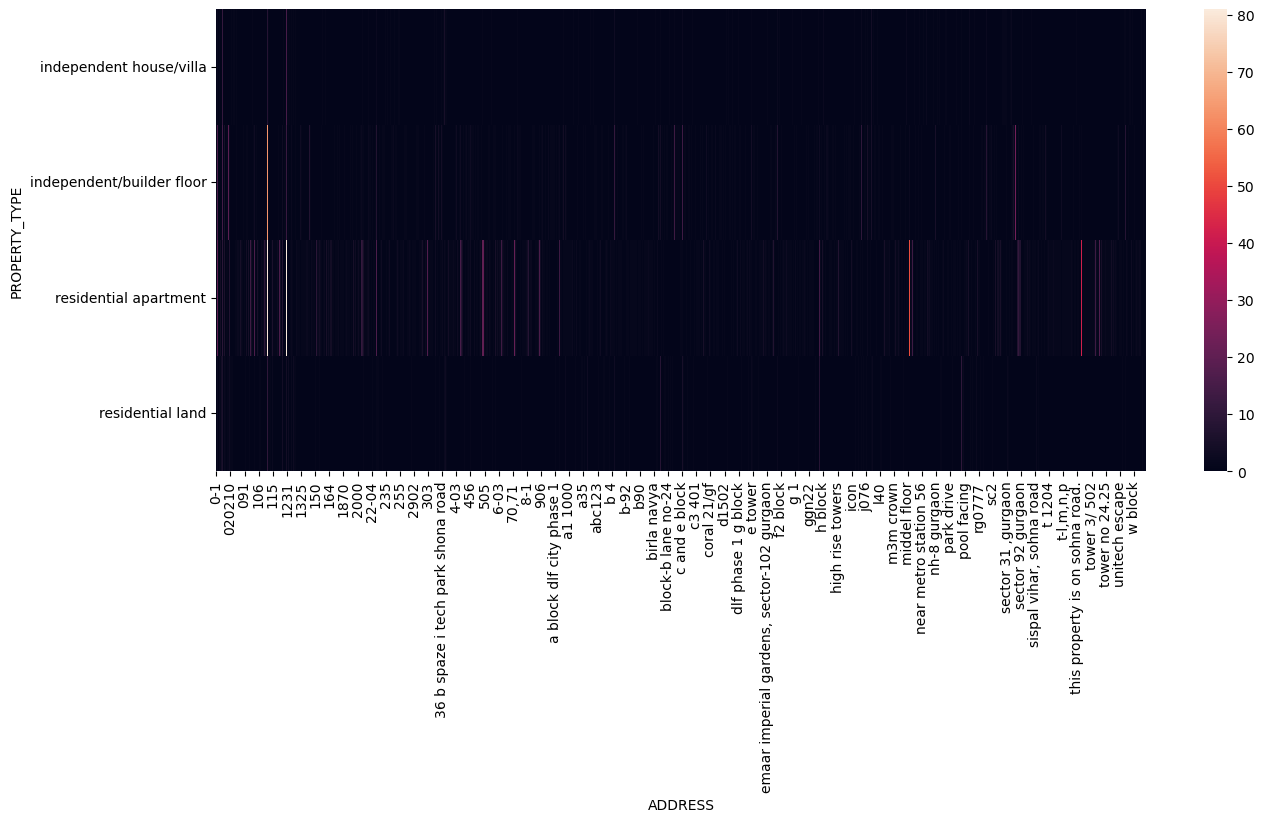

In [58]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['PROPERTY_TYPE'],df['ADDRESS'].sort_index()))


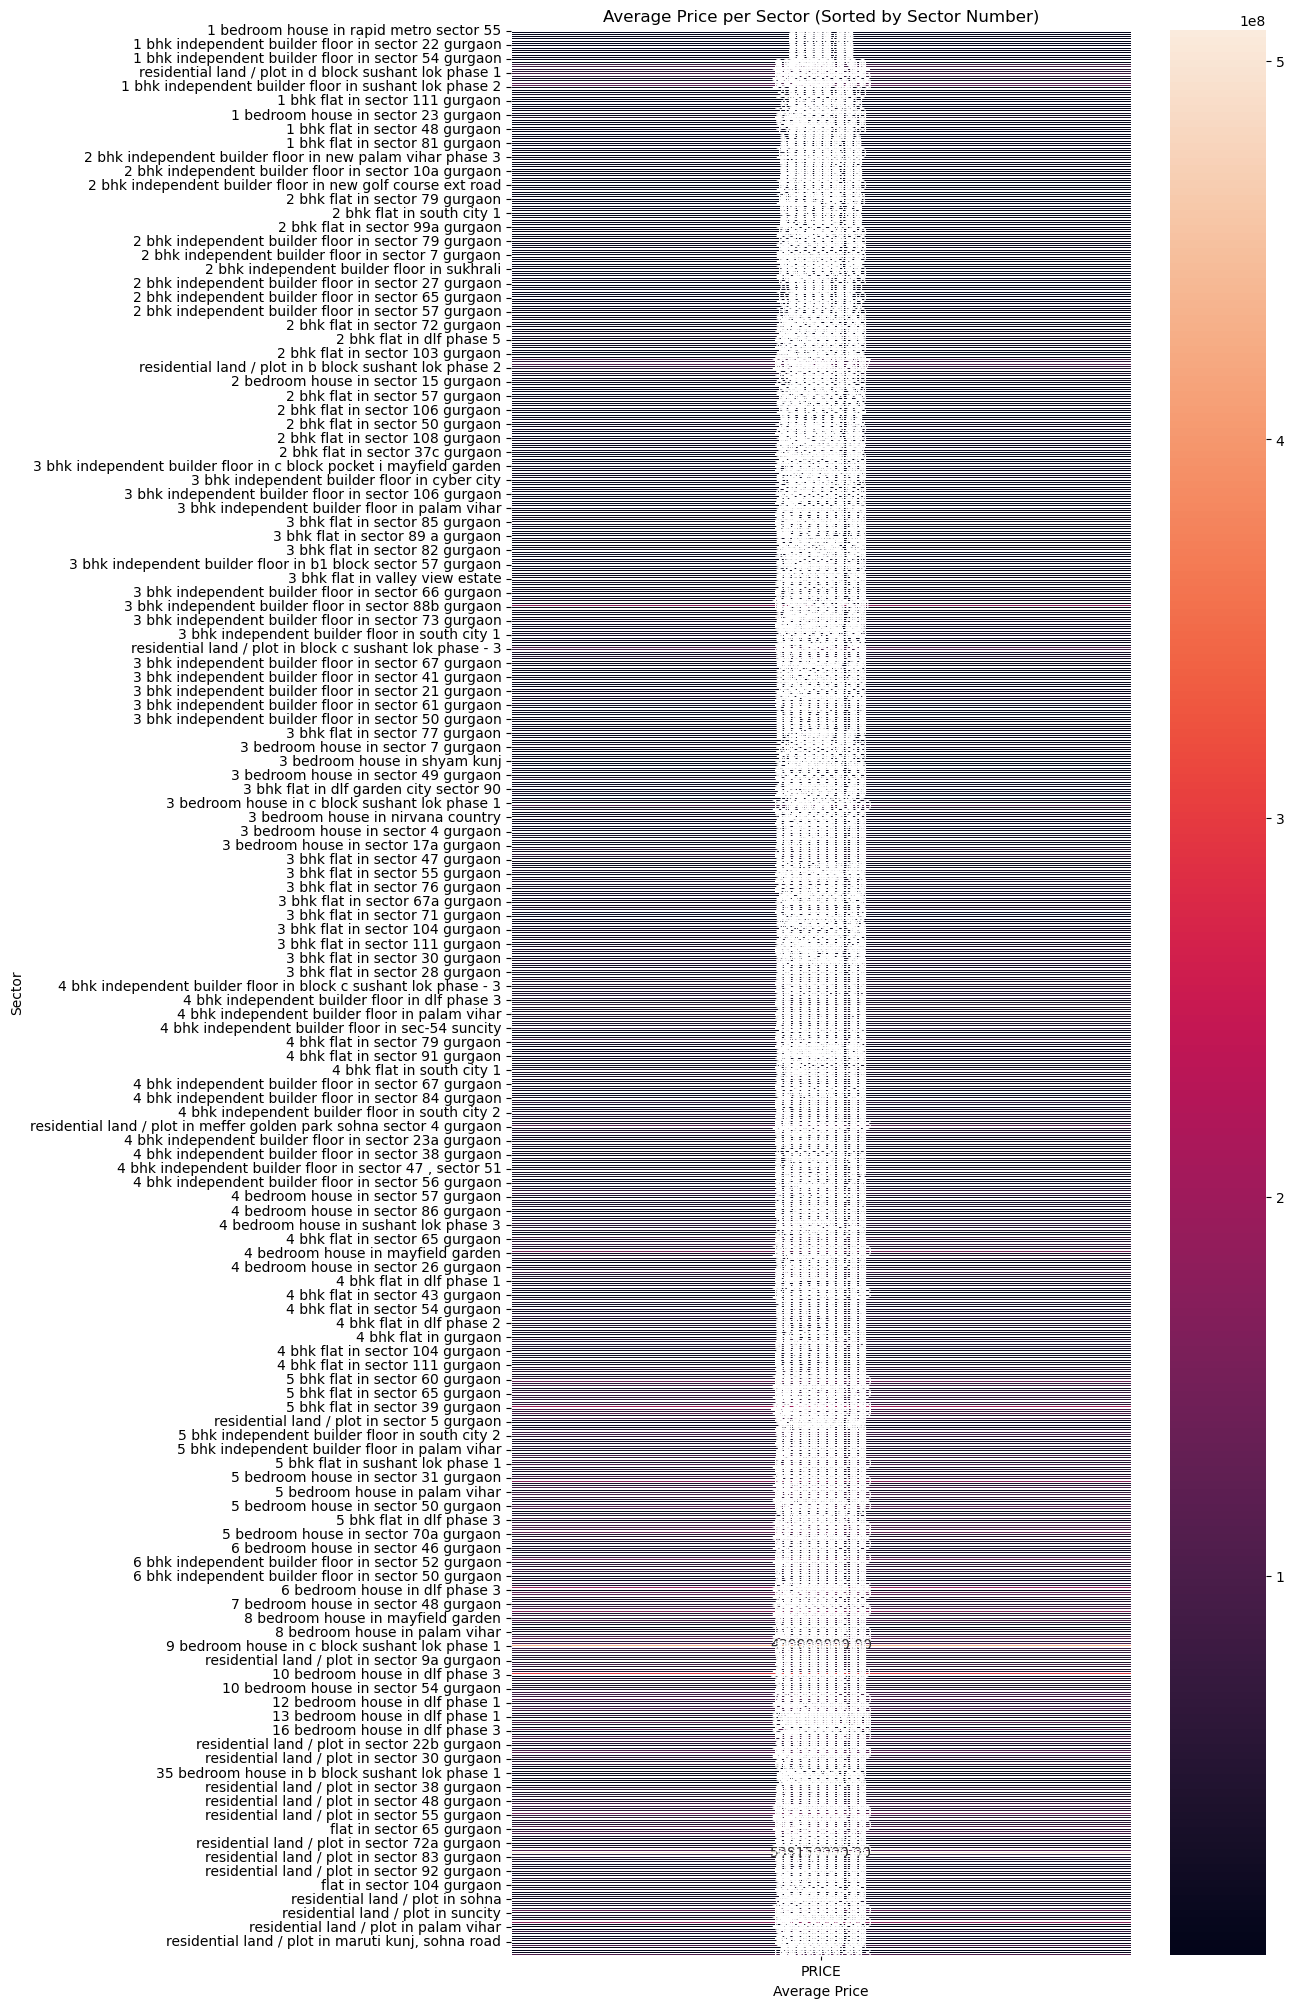

In [59]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('PROP_HEADING')['PRICE'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['PROP_HEADING'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(10, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('PROP_HEADING')[['PRICE']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

## merge floor number csv

In [100]:
floor_num = pd.read_csv("floor_num.csv")
floor_num.head(1)

PROP_ID FLOOR_NUM
0  H70597758         1

In [101]:
floor_num['PROP_ID'] =floor_num['PROP_ID'].str.lower()

In [102]:
floor_num.sample(10)

PROP_ID FLOOR_NUM
7443   a68135870         2
4234   a64232832        11
10089  y70786934         7
9234   k69907678         2
7468   b70726212         8
5418   q59278746         4
6119   j70255162       NaN
8069   u70219488       NaN
2391   p70629098         3
7264   f65844312        16

In [103]:
df = pd.merge(df, floor_num, on='PROP_ID')

In [104]:
df.sample(1)

SPID    PROP_ID     CITY     PRICE  PRICE_SQFT    AREA  \
2593  69584724  e69584724  gurgaon  225000.0        28.0  7900.0   

      TOTAL_LANDMARK_COUNT                     PROP_HEADING  \
2593                   6.0  5 bhk flat in sector 28 gurgaon   

                                            DESCRIPTION  \
2593  available for rent 5bhk plus servant room area...   

              PROPERTY_TYPE        FURNISH  FACING                     AGE  \
2593  residential apartment  Semifurnished       5  5-10 Year Old Property   

     TOTAL_FLOOR  BEDROOM_NUM             PROP_NAME  BALCONY_NUM   LATITUDE  \
2593    mid rise          5.0  silverglades the ivy          4.0  28.475639   

      LOGNITUDE  BHK_BED      LOCALITY_NAME         BUILDING_NAME  \
2593  77.082348      5.0  sector 28 gurgaon  silverglades the ivy   

              SOCIETY_NAME ADDRESS  TRNSPORTATION  ACCOMODATION  LEISURE  \
2593  silverglades the ivy     NaN              1             1        1   

      EDUCATION  HEALTH  OTHER  AMENITIES_SCORE  LANDMARKS_CLUSTER  \
2593          1       1      1              141                  1   

      LANDMARKS_N_SCORES_CLUSTER FLOOR_NUM  
2593                           3        10

In [98]:
##df.drop(columns = ['FLOOR_NUM_MAPPED'] , inplace = True)

In [105]:
df['FLOOR_NUM'].value_counts()

1     1213
2     1074
3      680
4      657
7      487
6      474
10     467
8      462
5      454
9      385
G      373
12     309
11     287
15     209
14     198
18     125
16     123
20      94
17      86
13      62
19      57
22      45
25      40
21      36
23      31
24      26
30      24
26      22
27      19
L       18
28      16
29      12
31       7
32       6
39       5
33       5
35       5
B        5
38       3
36       2
0        2
34       2
40       1
43       1
37       1
41       1
Name: FLOOR_NUM, dtype: int64

In [50]:
plt.figure(figsize=(10,4))
sns.barplot(data = df , x = 'FLOOR_NUM_y', y = 'PRICE')

<Axes: xlabel='FLOOR_NUM_y', ylabel='PRICE'>

In [52]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df , x = 'FLOOR_NUM_y', y = 'PRICE')

<Axes: xlabel='FLOOR_NUM_y', ylabel='PRICE'>

<Axes: xlabel='FLOOR_NUM_y', ylabel='PROPERTY_TYPE'>

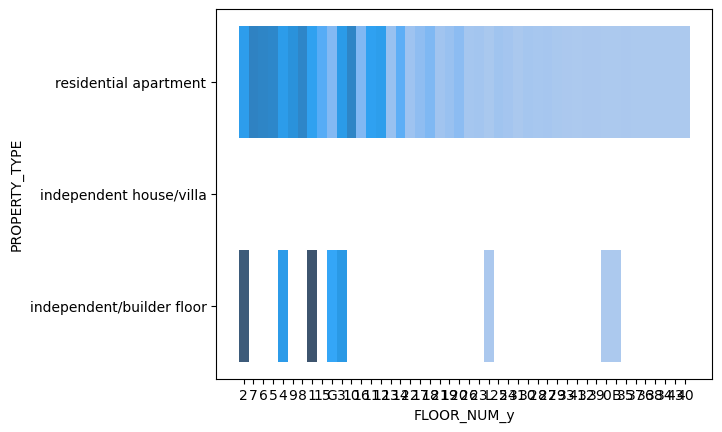

In [14]:
sns.histplot(x='FLOOR_NUM_y', y='PROPERTY_TYPE', data=df)

In [15]:
df['PROPERTY_TYPE'].value_counts()

residential apartment        5969
independent/builder floor    2480
residential land              989
independent house/villa       621
Name: PROPERTY_TYPE, dtype: int64

In [16]:
df[(df['PROPERTY_TYPE'] == 'residential apartment') & (df['PROPERTY_TYPE'] == 'independent house/villa') & df['FLOOR_NUM_y'] >10]

Empty DataFrame
Columns: [SPID, PROP_ID, CITY, PRICE, PRICE_SQFT, AREA, TOTAL_LANDMARK_COUNT, PROP_HEADING, DESCRIPTION, PROPERTY_TYPE, FURNISH, FACING, AGE, TOTAL_FLOOR, BEDROOM_NUM, PROP_NAME, BALCONY_NUM, FLOOR_NUM_x, LATITUDE, LOGNITUDE, BHK_BED, LOCALITY_NAME, BUILDING_NAME, SOCIETY_NAME, ADDRESS, TRNSPORTATION, ACCOMODATION, LEISURE, EDUCATION, HEALTH, OTHER, AMENITIES_SCORE, LANDMARKS_CLUSTER, LANDMARKS_N_SCORES_CLUSTER, FLOOR_NUM_y]
Index: []

In [19]:
df['FLOOR_NUM_y'] = pd.to_numeric(df['FLOOR_NUM_y'], errors='coerce')

In [20]:
 # checking for outliers
df[(df['PROPERTY_TYPE'].isin(['residential apartment', 'independent house/villa','independent/builder floor'])) & (df['FLOOR_NUM_y'] > 10)]

SPID    PROP_ID     CITY        PRICE  PRICE_SQFT     AREA  \
27     70319372  b70319372  gurgaon      13000.0        12.0   1200.0   
60     70625066  j70625066  gurgaon      15000.0        32.0    465.0   
64     70676072  q70676072  gurgaon      16000.0        27.0    585.0   
70     70485024  o70485024  gurgaon      16000.0        45.0    350.0   
73     70330772  i70330772  gurgaon      16000.0        19.0    836.0   
...         ...        ...      ...          ...         ...      ...   
10047  70760542  x70760542  gurgaon  400000000.0     54340.0   7361.0   
10051  70006602  j70006602  gurgaon  440000000.0     59459.0   7400.0   
10053  21691299  q21691299  gurgaon  450000000.0     49046.0   9175.0   
10055  70877280  b70877280  gurgaon  500000000.0     67851.0   7369.0   
10056  23798278  g23798278  gurgaon  550000000.0     43478.0  11500.0   

       TOTAL_LANDMARK_COUNT                      PROP_HEADING  \
27                      3.0   2 bhk flat in sector 84 gurgaon   
60                      4.0    1 bhk flat in sector 2 gurgaon   
64                     10.0  2 bhk flat in sector 37d gurgaon   
70                      8.0  1 bhk flat in sector 102 gurgaon   
73                      9.0  2 bhk flat in sector 70a gurgaon   
...                     ...                               ...   
10047                  15.0   4 bhk flat in sector 42 gurgaon   
10051                  15.0   4 bhk flat in sector 42 gurgaon   
10053                  15.0   5 bhk flat in sector 42 gurgaon   
10055                  15.0   4 bhk flat in sector 42 gurgaon   
10056                  15.0   5 bhk flat in sector 42 gurgaon   

                                             DESCRIPTION  \
27     gurgaon's most popular society antriksh height...   
60     that property is at a very good location, all ...   
64              signature gllobal the millennia sec 37 d   
70     rof aalayas is the most preferred destination ...   
73     this 2 bhk flat in sector 70a gurgaon is avail...   
...                                                  ...   
10047  excellent location, ultra luxury 4 bhk apartme...   
10051  check out this 4 bhk apartment for sale in dlf...   
10053  duplex house, corner unit is available at high...   
10055  luxury deals by expert \n\n7400 sq ft exclusiv...   
10056  for sale - penthouse, in dlf - the magnolias, ...   

               PROPERTY_TYPE        FURNISH  FACING                     AGE  \
27     residential apartment    Unfurnished       0   0-1 Year Old Property   
60     residential apartment  Semifurnished       7   1-5 Year Old Property   
64     residential apartment  Semifurnished       3   0-1 Year Old Property   
70     residential apartment      Furnished       3   0-1 Year Old Property   
73     residential apartment    Unfurnished       3   0-1 Year Old Property   
...                      ...            ...     ...                     ...   
10047  residential apartment  Semifurnished       3  5-10 Year Old Property   
10051  residential apartment  Semifurnished       0  5-10 Year Old Property   
10053  residential apartment  Semifurnished       5   0-1 Year Old Property   
10055  residential apartment  not available       1   1-5 Year Old Property   
10056  residential apartment  Semifurnished       5   0-1 Year Old Property   

      TOTAL_FLOOR  BEDROOM_NUM                           PROP_NAME  \
27      high rise          2.0                    antriksh heights   
60      high rise          1.0  mittal cosmos executive apartments   
64      high rise          2.0      signature global the millennia   
70      high rise          1.0                         rof aalayas   
73      high rise          2.0                 pyramid urban homes   
...           ...          ...                                 ...   
10047   high rise          4.0                   dlf the camellias   
10051   high rise          4.0                   dlf the camellias   
10053   high rise          5.0                   dlf 

In [21]:
df['FLOOR_NUM_y'].unique()

array([ 2.,  7.,  6.,  5.,  4.,  9.,  8., nan,  1., 15.,  3., 10., 16.,
       11., 12., 13., 14., 22., 17., 18., 21., 19., 20., 26., 23., 25.,
       24., 31., 30., 28., 27., 29., 33., 41., 32., 39.,  0., 35., 37.,
       36., 38., 34., 43., 40.])

## PRICE

<Axes: xlabel='AREA', ylabel='PRICE'>

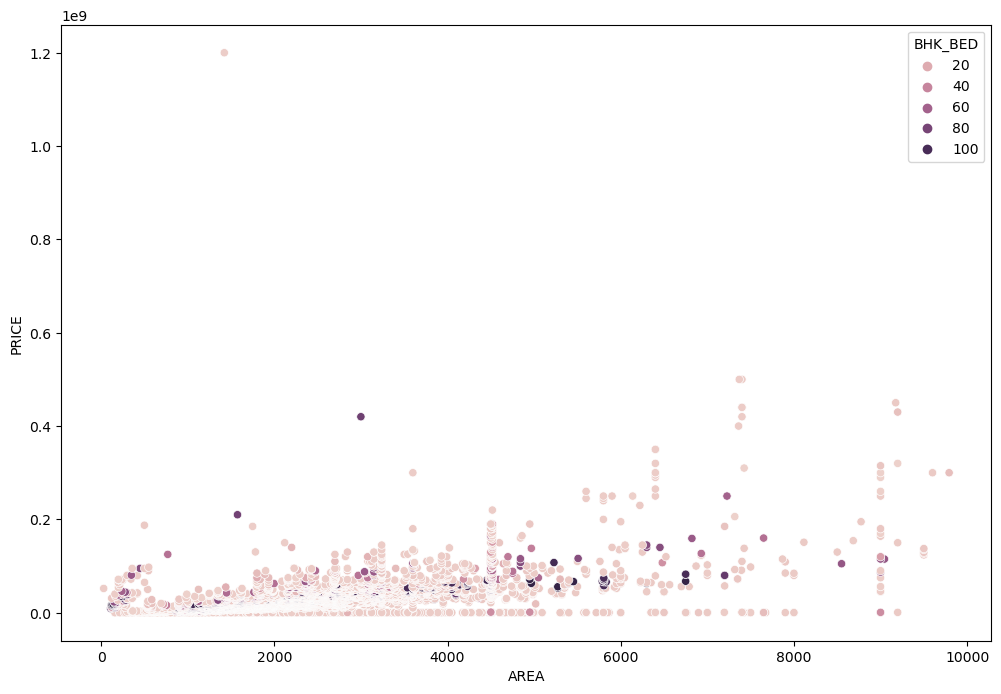

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['AREA']<10000]['AREA'],y=df['PRICE'],hue=df['BHK_BED'])

<Axes: xlabel='AREA', ylabel='PRICE'>

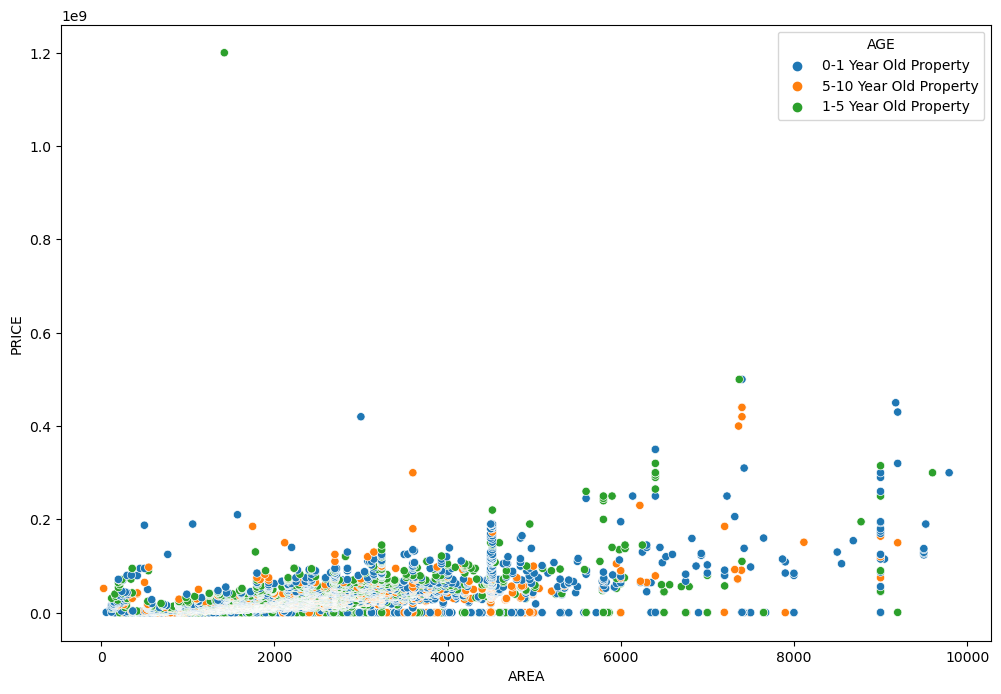

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =df[df['AREA']<10000]['AREA'],y =df['PRICE'],hue=df['AGE'])

<Axes: xlabel='AREA', ylabel='PRICE'>

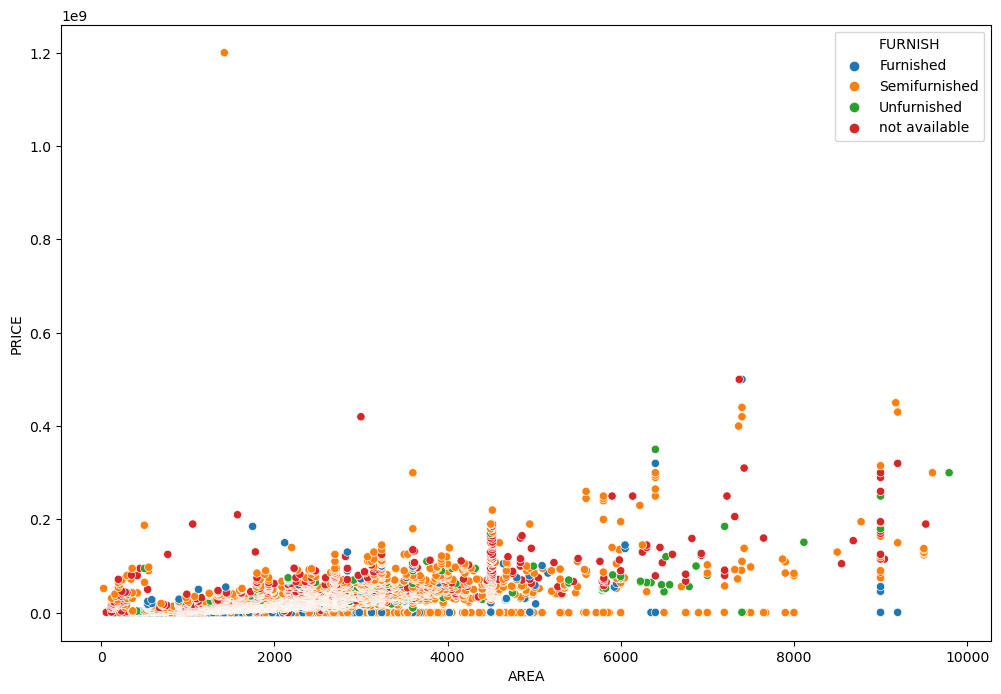

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =df[df['AREA']<10000]['AREA'],y =df['PRICE'],hue=df['FURNISH'].astype('category'))

<Axes: xlabel='BHK_BED', ylabel='PRICE'>

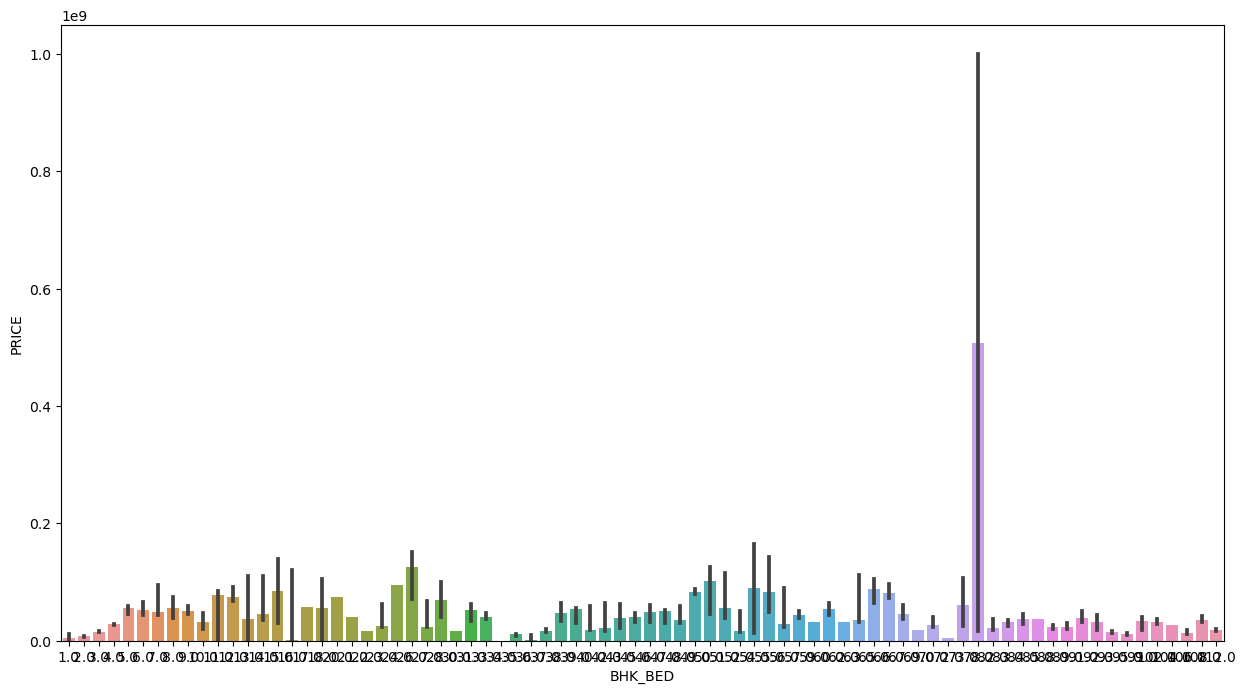

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['BHK_BED'],y=df['PRICE'],estimator=np.median)

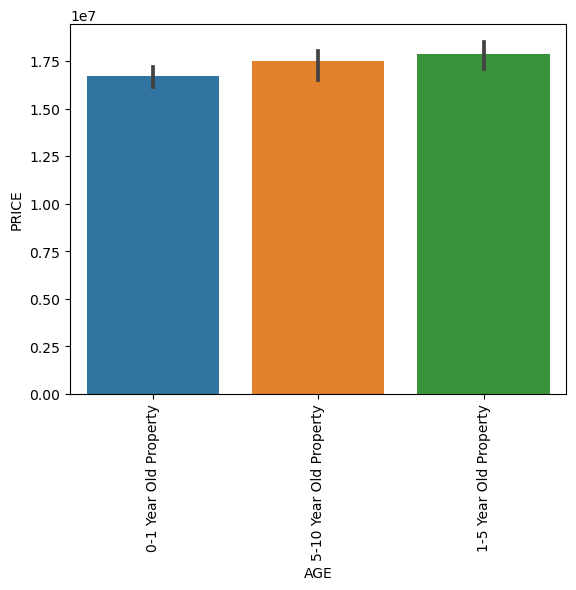

In [26]:
sns.barplot(x=df['AGE'],y=df['PRICE'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

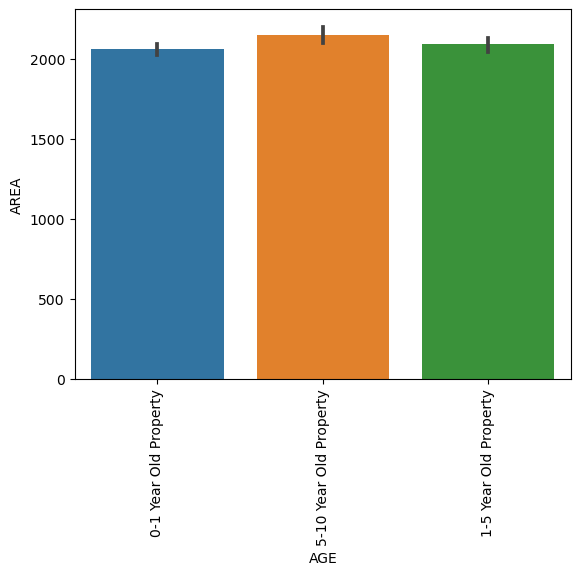

In [27]:
sns.barplot(x=df['AGE'],y=df['AREA'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='FURNISH', ylabel='PRICE'>

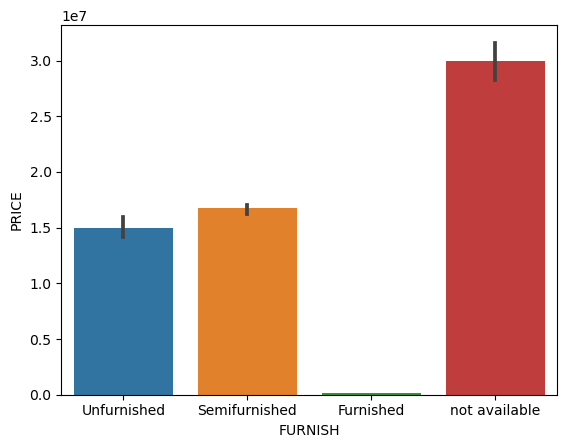

In [28]:
sns.barplot(x=df['FURNISH'],y=df['PRICE'],estimator=np.median)

## correlation

<Axes: >

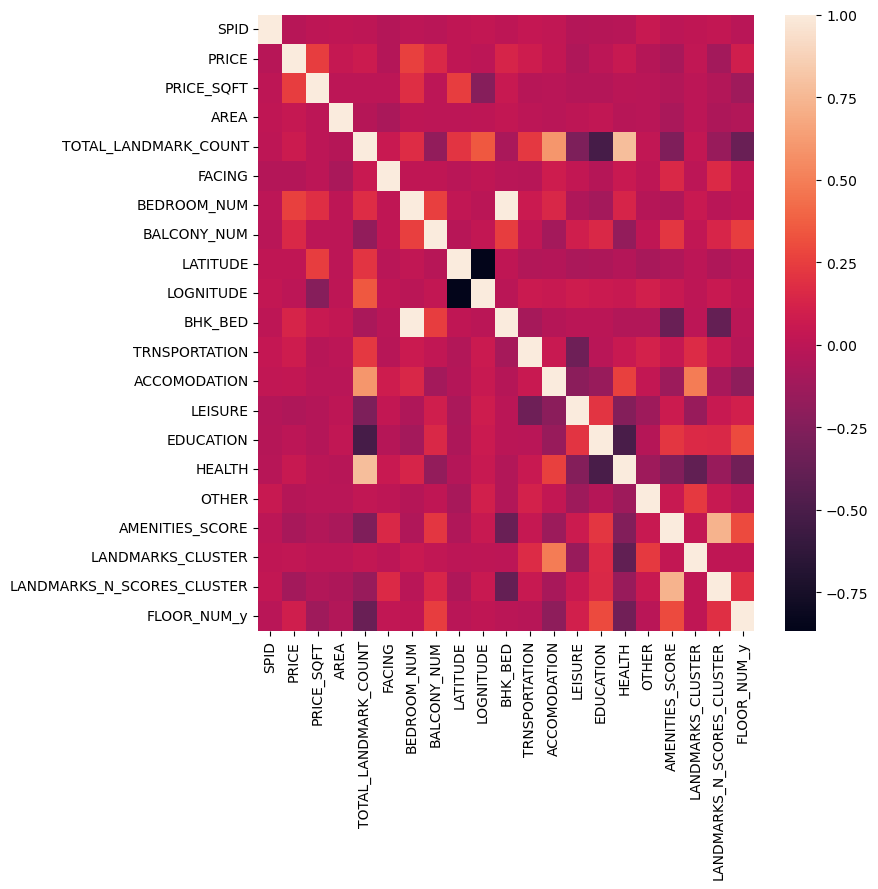

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

## assing value in  U, G, B value in  floor number column

In [111]:
import numpy as np

def map_floor_num(floor_num):
    if pd.notna(floor_num):
        if floor_num == 'G':
            return 1
        elif floor_num == 'L':
            return 0
        elif floor_num == 'B':
            return -1
        else:
            return floor_num  # Return the original value if not 'G', 'L', or 'B'
    else:
        return np.nan  # Handle NaN values in the column

# Assuming df is your DataFrame and 'FLOOR_NUM' is the column name
df['FLOOR_NUM_MAPPED'] = df['FLOOR_NUM'].apply(map_floor_num)


In [112]:
df["FLOOR_NUM"] =df["FLOOR_NUM"].apply(map_floor_num)

In [113]:
df["FLOOR_NUM"].value_counts()

1     1213
2     1074
3      680
4      657
7      487
6      474
10     467
8      462
5      454
9      385
1      373
12     309
11     287
15     209
14     198
18     125
16     123
20      94
17      86
13      62
19      57
22      45
25      40
21      36
23      31
24      26
30      24
26      22
27      19
0       18
28      16
29      12
31       7
32       6
33       5
35       5
39       5
-1       5
38       3
36       2
34       2
0        2
43       1
41       1
37       1
40       1
Name: FLOOR_NUM, dtype: int64

In [90]:
df.head(10)

SPID    PROP_ID     CITY   PRICE  PRICE_SQFT    AREA  \
0  70480214  j70480214  gurgaon  5500.0        15.0   350.0   
1  70794112  u70794112  gurgaon  7000.0        10.0   700.0   
2  70607360  o70607360  gurgaon  7500.0        14.0   514.0   
3  70794132  f70794132  gurgaon  8500.0         9.0   910.0   
4  69621256  s69621256  gurgaon  8500.0         8.0   980.0   
5  69980156  p69980156  gurgaon  8500.0        23.0   366.0   
6  70794066  j70794066  gurgaon  8500.0         8.0   980.0   
7  70794156  m70794156  gurgaon  8500.0         8.0  1002.0   
8  69971436  o69971436  gurgaon  9000.0        13.0   645.0   
9  70794168  b70794168  gurgaon  9500.0         9.0  1009.0   

   TOTAL_LANDMARK_COUNT                      PROP_HEADING  \
0                   3.0  1 bhk flat in sector 107 gurgaon   
1                  15.0   1 bhk flat in sector 95 gurgaon   
2                   3.0  2 bhk flat in sector 107 gurgaon   
3                  15.0   2 bhk flat in sector 95 gurgaon   
4                   3.0   2 bhk flat in sector 95 gurgaon   
5                  15.0   1 bhk flat in sector 95 gurgaon   
6                   3.0   2 bhk flat in sector 95 gurgaon   
7                  12.0  2 bhk flat in sector 95a gurgaon   
8                  15.0   2 bhk flat in sector 95 gurgaon   
9                   4.0   3 bhk flat in sector 92 gurgaon   

                                         DESCRIPTION          PROPERTY_TYPE  \
0  very much demanding property at dwarka express...  residential apartment   
1  rof ananda , sector 95, near to wazirpur villa...  residential apartment   
2  cheap rent and best place and location at dwar...  residential apartment   
3  rof ananda , sector 95, near to wazirpur villa...  residential apartment   
4  find this 2 bhk apartment for rent in sector 9...  residential apartment   
5  this 1 bhk flat in sector 95 gurgaon is availa...  residential apartment   
6  ramsons kshitij , sector 95, near to wazirpur ...  residential apartment   
7  signature global the roselia, sector 95a, near...  residential apartment   
8  rof ananda 2bhk+study flat unfurnished\n645sqf...  residential apartment   
9  gls avenue 51, sector 92, near to hayatpur vil...  residential apartment   

         FURNISH  FACING                     AGE TOTAL_FLOOR  BEDROOM_NUM  \
0    Unfurnished       5   0-1 Year Old Property   high rise          1.0   
1  Semifurnished       3   0-1 Year Old Property   high rise          1.0   
2    Unfurnished       5  5-10 Year Old Property   high rise          2.0   
3  Semifurnished       3   0-1 Year Old Property   high rise          2.0   
4    Unfurnished       1   0-1 Year Old Property   high rise          2.0   
5  Semifurnished       8   0-1 Year Old Property   high rise          1.0   
6  Semifurnished       3   0-1 Year Old Property   high rise          2.0   
7  Semifurnished       3   0-1 Year Old Property   high rise          2.0   
8    Unfurnished       5   0-1 Year Old Property   high rise          2.0   
9  Semifurnished       3   0-1 Year Old Property   high rise          3.0   

                   PROP_NAME  BALCONY_NUM FLOOR_NUM_x   LATITUDE  LOGNITUDE  \
0  signature global solera 2          2.0    low rise  28.512525  76.973543   
1                 rof ananda          1.0    mid rise  28.484814  77.080853   
2  signature global solera 2          1.0    mid rise  28.512525  76.973543   
3                 rof ananda          1.0    mid rise  28.484814  77.080853   
4            ramsons kshitij          1.0    mid rise  28.416679  76.902677   
5                 rof ananda          1.0    mid rise  28.484814  77.080853   
6            ramsons kshitij          1.0    mid rise  28.416679  76.902677   
7      signature the roselia          1.0    mid rise  28.424060  76.927954   
8                 rof ananda          2.0    mid rise  28.414324  76.908124   
9              gls avenue 51          1.0    mid rise  28.413900  76.917083   

   BHK_BED       LOCALITY_NAME              BUILDING_

In [39]:
df.corr()['PRICE'].sort_values(ascending=False)

PRICE                         1.000000
BEDROOM_NUM                   0.260111
PRICE_SQFT                    0.244502
BALCONY_NUM                   0.147668
BHK_BED                       0.128683
TRNSPORTATION                 0.079966
TOTAL_LANDMARK_COUNT          0.073034
HEALTH                        0.046495
AREA                          0.045068
ACCOMODATION                  0.028266
LANDMARKS_CLUSTER             0.021797
LATITUDE                      0.010753
EDUCATION                    -0.000204
LOGNITUDE                    -0.005060
SPID                         -0.021629
OTHER                        -0.028495
FACING                       -0.040219
LEISURE                      -0.059585
AMENITIES_SCORE              -0.088461
LANDMARKS_N_SCORES_CLUSTER   -0.108462
Name: PRICE, dtype: float64

In [117]:
df.head(1)

SPID    PROP_ID     CITY   PRICE  PRICE_SQFT   AREA  \
0  70480214  j70480214  gurgaon  5500.0        15.0  350.0   

   TOTAL_LANDMARK_COUNT                      PROP_HEADING  \
0                   3.0  1 bhk flat in sector 107 gurgaon   

                                         DESCRIPTION          PROPERTY_TYPE  \
0  very much demanding property at dwarka express...  residential apartment   

       FURNISH  FACING                    AGE TOTAL_FLOOR  BEDROOM_NUM  \
0  Unfurnished       5  0-1 Year Old Property   high rise          1.0   

                   PROP_NAME  BALCONY_NUM   LATITUDE  LOGNITUDE  BHK_BED  \
0  signature global solera 2          2.0  28.512525  76.973543      1.0   

        LOCALITY_NAME              BUILDING_NAME               SOCIETY_NAME  \
0  sector 107 gurgaon  signature global solera 2  signature global solera 2   

  ADDRESS  TRNSPORTATION  ACCOMODATION  LEISURE  EDUCATION  HEALTH  OTHER  \
0     NaN              1             0        0          0       0      2   

   AMENITIES_SCORE  LANDMARKS_CLUSTER  LANDMARKS_N_SCORES_CLUSTER FLOOR_NUM  
0               86                  1                           1         2

In [116]:
df.drop(columns = ['FLOOR_NUM_MAPPED'] , inplace = True)

In [118]:
df.to_csv('gurgaon_10kk_After_multivariant_cleaned_Fvinal_v1.csv', index=False)

In [119]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
df = pd.read_csv('gurgaon_10kk_After_multivariant_cleaned_Fvinal_v1.csv').drop_duplicates()

# Create the ProfileReport object
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\lenovo\anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'g

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
df.rename(columns={'FLOOR_NUM_y':'FLOOR_NUM'},inplace=True)